# Title: Segmetation Data set 
it is a complex of codes to extraxt data from the collected data of streetscape of Isfahan , a famous historic city in Iran, the information are used to recognised better the indexes of human perception. 

In [23]:
#  we use Standard library as below 
import os
from pathlib import Path

# for  Data handling
import numpy as np
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [24]:
import pandas as pd

class DataAnalyzer:
    def __init__(self, filepath):
        self.df = pd.read_csv(filepath)

    def add_multiple_merges(self, merge_dict):
        for new_col, cols_to_merge in merge_dict.items():
            self.df[new_col] = self.df[cols_to_merge].sum(axis=1)
    def drop_columns(self, columns_to_drop):
        """
        Drop one or more columns safely from the DataFrame.
        Example: analyzer.drop_columns(["Window", "Door"])
        """
        self.df.drop(columns=columns_to_drop, errors="ignore", inplace=True)
        print(f"Dropped columns: {columns_to_drop}")
        return self.df

    def save_to_csv(self, output_path):
        self.df.to_csv(output_path, index=False)
        print(f"Saved CSV to {output_path}")

    def save_to_excel(self, output_path):
        self.df.to_excel(output_path, index=False)
        print(f" Saved Excel to {output_path}")


# Use the correct class here
analyzer = DataAnalyzer("/Users/hessam/Documents/GitHub/StreetPerception_ML/data/segmentation pixel -2.csv")
 
# Example merges
merge_dict = {
    "merge_E_H_N": [" Bench and Food stands", "Bulletin board", "Symbol and Sign"],
    "merge_B_C_D_": ["Window", "Door"],
    "Wall_pixels" : [
    "Brick wall with fence",
    "Wall",
    "Steps",
    "Buildings wall",
    "Buildings with column",
    "Metal Fence"
]
}

columns_to_drop= (
    "Brick wall with fence",
    "Wall",
    "Steps",
    "Buildings wall",
    "Buildings with column",
    "Metal Fence")

# Add ALL merges from dictionary
analyzer.add_multiple_merges(merge_dict)
analyzer.drop_columns(columns_to_drop)

# Save outputs
analyzer.save_to_excel("/Users/hessam/Documents/GitHub/StreetPerception_ML/data/merged_output.xlsx")
analyzer.save_to_csv("/Users/hessam/Documents/GitHub/StreetPerception_ML/data/merged_output.csv")

Dropped columns: ('Brick wall with fence', 'Wall', 'Steps', 'Buildings wall', 'Buildings with column', 'Metal Fence')
 Saved Excel to /Users/hessam/Documents/GitHub/StreetPerception_ML/data/merged_output.xlsx
Saved CSV to /Users/hessam/Documents/GitHub/StreetPerception_ML/data/merged_output.csv


In [25]:
analyzer.df.head()

,Image_ID,Window,Door,shops shutter,Bench and Food stands,Brick wall with fence,Steps,Bulletin board,Bike,Motor Bike,...,Buildings with column,Autos,Sky,Palm trees,Dome,Sunshade,Class_34,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,AmadMid,0.0,0.0,0.0,0.0,5067.0,0.0,0.0,0.0,1331.0,...,141.0,25647.0,15185.0,67102.0,0.0,0.0,0.0,0.0,0.0,5210.0
1,AmadMid,0.0,13112.0,0.0,638.0,213.0,7317.0,1308.0,0.0,422.0,...,15143.0,0.0,52615.0,9288.0,0.0,0.0,0.0,1946.0,13112.0,25307.0
2,AmadMid,0.0,44.0,0.0,283.0,0.0,23915.0,24.0,0.0,3821.0,...,0.0,41028.0,49733.0,712.0,0.0,0.0,0.0,307.0,44.0,39891.0
3,AmadMid,0.0,0.0,0.0,68.0,0.0,0.0,860.0,0.0,0.0,...,0.0,0.0,37594.0,0.0,0.0,0.0,0.0,928.0,0.0,1.0
4,AmadMid,0.0,0.0,0.0,73.0,0.0,0.0,25.0,0.0,0.0,...,0.0,4398.0,29504.0,32839.0,0.0,0.0,0.0,98.0,0.0,0.0


In [26]:
# List of column groups
wall_cols = [
    "Brick wall with fence", "Wall", "Steps",
    "Buildings wall", "Buildings with column", "Metal Fence"
]

ehn_cols = [" Bench and Food stands", "Bulletin board", "Symbol and Sign"]
bd_cols = ["Window", "Door"]
extra_cols = ["Class_34", "group_id"]

cols_to_drop = wall_cols + ehn_cols + bd_cols + extra_cols

# Safely drop columns ONLY if they exist
df_clean = analyzer.df.drop(columns=cols_to_drop, errors="ignore")

# If analyzer.drop_columns() expects a DataFrame, update it
analyzer.df = df_clean


In [27]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [28]:
analyzer.df.head()

,Image_ID,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,AmadMid,0.0,0.0,1331.0,0.0,0.0,0.0,31766.0,402261.0,0.0,...,0.0,58048.0,25647.0,15185.0,67102.0,0.0,0.0,0.0,0.0,5210.0
1,AmadMid,0.0,0.0,422.0,0.0,0.0,292.0,73401.0,388906.0,0.0,...,320.0,125903.0,0.0,52615.0,9288.0,0.0,0.0,1946.0,13112.0,25307.0
2,AmadMid,0.0,0.0,3821.0,0.0,0.0,4706.0,17553.0,261617.0,0.0,...,346.0,121508.0,41028.0,49733.0,712.0,0.0,0.0,307.0,44.0,39891.0
3,AmadMid,0.0,0.0,0.0,0.0,0.0,245.0,34312.0,401291.0,0.0,...,0.0,58673.0,0.0,37594.0,0.0,0.0,0.0,928.0,0.0,1.0
4,AmadMid,0.0,0.0,0.0,0.0,0.0,39.0,145813.0,326507.0,0.0,...,1598.0,44220.0,4398.0,29504.0,32839.0,0.0,0.0,98.0,0.0,0.0


In [29]:
analyzer.save_to_excel("/Users/hessam/Documents/GitHub/StreetPerception_ML/data/droped_output.xlsx")
analyzer.save_to_csv("/Users/hessam/Documents/GitHub/StreetPerception_ML/data/droped_output.csv")

 Saved Excel to /Users/hessam/Documents/GitHub/StreetPerception_ML/data/droped_output.xlsx
Saved CSV to /Users/hessam/Documents/GitHub/StreetPerception_ML/data/droped_output.csv


# Categorizing Data Frame based on Street Names from CSV file from sample 1 (first picture) to 193 (the last picture)


In [30]:
## samples 1 to 15 from AmadMid Street
analyzer = DataAnalyzer("/Users/hessam/Documents/GitHub/StreetPerception_ML/data/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]


# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
amadmid_df = df.iloc[1:15, :]

# Show this subset
display(amadmid_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = amadmid_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
1,0.0,0.0,3821.0,0.0,0.0,4706.0,17553.0,261617.0,0.0,0.0,...,346.0,121508.0,41028.0,49733.0,712.0,0.0,0.0,307.0,44.0,39891.0
2,0.0,0.0,0.0,0.0,0.0,245.0,34312.0,401291.0,0.0,16.0,...,0.0,58673.0,0.0,37594.0,0.0,0.0,0.0,928.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,39.0,145813.0,326507.0,0.0,10148.0,...,1598.0,44220.0,4398.0,29504.0,32839.0,0.0,0.0,98.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,166.0,115770.0,337904.0,0.0,36.0,...,0.0,42552.0,17512.0,55483.0,19857.0,0.0,0.0,2546.0,985.0,790.0
5,0.0,0.0,0.0,0.0,0.0,690.0,22119.0,418896.0,0.0,4286.0,...,24.0,58447.0,0.0,47400.0,9167.0,0.0,0.0,1726.0,3.0,257.0
6,0.0,0.0,18507.0,0.0,0.0,292.0,30685.0,479148.0,0.0,626.0,...,0.0,69223.0,4240.0,30991.0,0.0,0.0,0.0,0.0,0.0,2858.0
7,0.0,0.0,0.0,0.0,0.0,74.0,7251.0,494081.0,0.0,2087.0,...,0.0,132048.0,0.0,113858.0,0.0,0.0,0.0,342.0,140.0,964.0
8,0.0,0.0,3917.0,0.0,0.0,0.0,7487.0,453697.0,15.0,188.0,...,0.0,88432.0,11430.0,53025.0,0.0,0.0,0.0,27933.0,22.0,623.0
9,0.0,0.0,0.0,0.0,0.0,10332.0,65842.0,440497.0,0.0,148.0,...,39.0,104588.0,0.0,38625.0,25737.0,0.0,0.0,58.0,0.0,0.0
10,60.0,0.0,530.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,...,0.0,0.0,114922.0,8913.0,73014.0,0.0,0.0,0.0,25.0,0.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,60.0,0.0,26836.0,0.0,0.0,18482.0,574504.0,5123049.0,15.0,26784.0,...,4081.0,838248.0,220725.0,730543.0,461485.0,0.0,0.0,37571.0,3530.0,76934.0


# Making normalized DataFrame (df_ratio_)


In [31]:
## Through Compute the mean ratio of each feature pixel across all other pixel features of one photo.
### Each row = one photo
### Each column = one class (greenery, wall, sky, etc.)
### Each cell = ratio of that class in that photo
### Then go down across column( which defined as df.iloc[1:15, :])
#### samples 1 to 15 from AmadMid Street

df_ratio_15 = amadmid_df.div(amadmid_df.sum(axis=1), axis=0)

# df=This is your original DataFrame 
# axis=1: each row = one photo,axis=1 means "move horizontally across columns
# axis=0: each column = one pixel class (e.g., greenery, building, sky, etc.).
# axis=0: mean "move vertically down rows
# df_ratio: each value represents a ratio or percentage of that class (e.g., trees or buildings)
# in the total pixels of the same photo 

In [32]:
## samples 1 to 15 from AmadMid Street
display(df_ratio_15)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
1,0.000000,0.0,0.007059,0.0,0.0,0.008694,0.032430,0.483343,0.000000,0.000000,...,0.000639,0.224489,0.075800,0.091883,0.001315,0.0,0.0,0.000567,0.000081,0.073699
2,0.000000,0.0,0.000000,0.0,0.0,0.000460,0.064368,0.752806,0.000000,0.000030,...,0.000000,0.110068,0.000000,0.070525,0.000000,0.0,0.0,0.001741,0.000000,0.000002
3,0.000000,0.0,0.000000,0.0,0.0,0.000066,0.244996,0.548600,0.000000,0.017051,...,0.002685,0.074299,0.007390,0.049573,0.055176,0.0,0.0,0.000165,0.000000,0.000000
4,0.000000,0.0,0.000000,0.0,0.0,0.000280,0.195030,0.569244,0.000000,0.000061,...,0.000000,0.071685,0.029501,0.093469,0.033452,0.0,0.0,0.004289,0.001659,0.001331
5,0.000000,0.0,0.000000,0.0,0.0,0.001226,0.039287,0.744023,0.000000,0.007613,...,0.000043,0.103811,0.000000,0.084190,0.016282,0.0,0.0,0.003066,0.000005,0.000456
6,0.000000,0.0,0.029073,0.0,0.0,0.000459,0.048204,0.752703,0.000000,0.000983,...,0.000000,0.108744,0.006661,0.048684,0.000000,0.0,0.0,0.000000,0.000000,0.004490
7,0.000000,0.0,0.000000,0.0,0.0,0.000099,0.009657,0.658033,0.000000,0.002780,...,0.000000,0.175866,0.000000,0.151640,0.000000,0.0,0.0,0.000455,0.000186,0.001284
8,0.000000,0.0,0.006056,0.0,0.0,0.000000,0.011576,0.701482,0.000023,0.000291,...,0.000000,0.136729,0.017672,0.081984,0.000000,0.0,0.0,0.043189,0.000034,0.000963
9,0.000000,0.0,0.000000,0.0,0.0,0.015064,0.095998,0.642249,0.000000,0.000216,...,0.000057,0.152490,0.000000,0.056316,0.037525,0.0,0.0,0.000085,0.000000,0.000000
10,0.000304,0.0,0.002684,0.0,0.0,0.000000,0.000132,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.581913,0.045131,0.369710,0.0,0.0,0.000000,0.000127,0.000000


# Propagating means (Mean Ratio) to be used in Correlation theory 
###  by dividing rows of ratio into smaller group and then get .mean from them to be used in Pearson correlation.Pearson Correlation works in large and at least 20 to 30  data set. 

In [33]:
## samples 1 to 15 from AmadMid Street
#we need to group within DataFrame by artificial “group_id” to create smaller chunks.
#It makes more Numeric.mean  among ratio Data Frame to be used in Pearson Correlation.  


groups = np.arange(len(df_ratio_15)) // 5

street_part_means_15 = (
    df_ratio_15.groupby(groups)
    .mean(numeric_only=True)
    .reset_index(drop=True)
)


street_part_means_15


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0.000000,0.0,0.001412,0.0,0.0,0.002145,0.115222,0.619603,0.000000,0.004951,...,0.000673,0.116870,0.022538,0.077928,0.021245,0.0,0.0,0.001965,0.000349,0.015098
1,0.000061,0.0,0.007563,0.0,0.0,0.003124,0.033113,0.550894,0.000005,0.000854,...,0.000011,0.114766,0.121249,0.076751,0.081447,0.0,0.0,0.008746,0.000069,0.001347
2,0.000000,0.0,0.000023,0.0,0.0,0.000729,0.054791,0.627384,0.000000,0.003514,...,0.000930,0.046934,0.011028,0.107393,0.129919,0.0,0.0,0.001663,0.000976,0.014434


In [34]:
## samples 1 to 15 from AmadMid Street
# it is to melt (reshape) the wide dataframe into long format
street_part_means_long_15 = street_part_means_15.melt(
    var_name="Feature",          # name for feature column
    value_name="Mean_Ratio"      # name for ratio column
)

display(street_part_means_long_15)


,Feature,Mean_Ratio
0,shops shutter,0.000000
1,shops shutter,0.000061
2,shops shutter,0.000000
3,Bike,0.000000
4,Bike,0.000000
...,...,...
61,merge_B_C_D_,0.000069
62,merge_B_C_D_,0.000976
63,Wall_pixels,0.015098
64,Wall_pixels,0.001347


In [37]:
street_mean_ratios_15 = df_ratio_15.mean(axis=0)
street_mean_ratios_15

 shops shutter               0.000022
Bike                         0.000000
Motor Bike                   0.003212
Flower                       0.000000
Flower box                   0.000000
Grass                        0.002090
Plant cover                  0.068631
Path and sidewalk            0.597287
Person in group              0.000002
Person standing              0.003077
Person sitting               0.000081
Trees with oval shape        0.000000
Water                        0.000510
Trees with columnar shape    0.096137
Autos                        0.054504
Sky                          0.085926
Palm trees                   0.073795
Dome                         0.000000
Sunshade                     0.000000
merge_E_H_N                  0.004301
merge_B_C_D_                 0.000428
Wall_pixels                  0.009997
dtype: float64

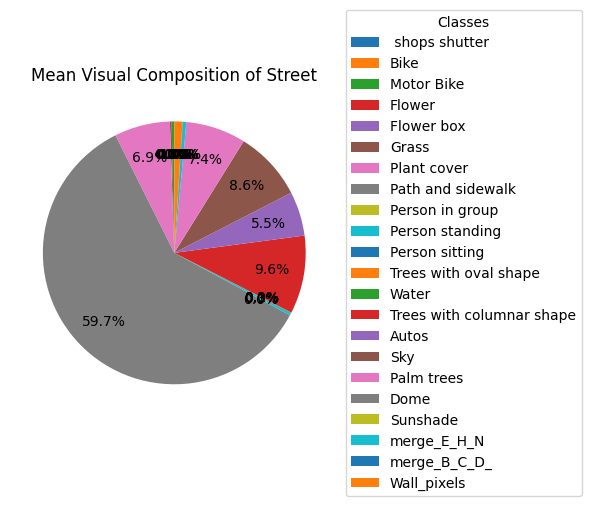

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    street_mean_ratios_15,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.75
)

ax.legend(
    wedges,
    street_mean_ratios_15.index,
    title="Classes",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Mean Visual Composition of Street")
plt.tight_layout()
plt.show()



In [40]:
## samples 1 to 15 from AmadMid Street
street_part_means_long_15.to_csv("street_part_means_long_15.csv", index=False)


In [39]:
street_mean_ratios_15 = df_ratio_15.mean(axis=0)
street_mean_ratios_15

 shops shutter               0.000022
Bike                         0.000000
Motor Bike                   0.003212
Flower                       0.000000
Flower box                   0.000000
Grass                        0.002090
Plant cover                  0.068631
Path and sidewalk            0.597287
Person in group              0.000002
Person standing              0.003077
Person sitting               0.000081
Trees with oval shape        0.000000
Water                        0.000510
Trees with columnar shape    0.096137
Autos                        0.054504
Sky                          0.085926
Palm trees                   0.073795
Dome                         0.000000
Sunshade                     0.000000
merge_E_H_N                  0.004301
merge_B_C_D_                 0.000428
Wall_pixels                  0.009997
dtype: float64

In [42]:
analyzer = DataAnalyzer("/Users/hessam/Documents/GitHub/StreetPerception_ML/data/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
AmadR_df = df.iloc[16:34, :]

# Show this subset
display(AmadR_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = AmadR_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
16,746.0,0.0,12.0,0.0,0.0,493.0,1791.0,345057.0,0.0,4551.0,...,0.0,69253.0,5080.0,27026.0,0.0,0.0,0.0,1573.0,63865.0,4436.0
17,5933.0,0.0,0.0,0.0,0.0,135.0,65384.0,222772.0,0.0,241.0,...,122.0,29839.0,0.0,49757.0,70371.0,0.0,0.0,2688.0,58.0,4552.0
18,23489.0,0.0,0.0,0.0,0.0,22.0,30258.0,322636.0,0.0,6.0,...,644.0,127194.0,0.0,8890.0,0.0,0.0,0.0,1297.0,108.0,33567.0
19,0.0,0.0,0.0,0.0,0.0,18.0,736.0,216078.0,0.0,527.0,...,5.0,27341.0,0.0,73240.0,0.0,0.0,0.0,31.0,0.0,69919.0
20,256.0,0.0,0.0,0.0,0.0,543.0,2134.0,441009.0,0.0,3457.0,...,0.0,79946.0,0.0,72612.0,0.0,0.0,0.0,300.0,19819.0,7.0
21,33859.0,0.0,0.0,0.0,0.0,0.0,29270.0,258051.0,0.0,586.0,...,86.0,98032.0,0.0,2039.0,40.0,0.0,0.0,8154.0,726.0,30493.0
22,338.0,0.0,20.0,0.0,0.0,553.0,1832.0,341890.0,0.0,7022.0,...,0.0,73834.0,6088.0,27045.0,0.0,0.0,0.0,1287.0,63551.0,4292.0
23,0.0,0.0,0.0,0.0,0.0,0.0,65637.0,296727.0,0.0,0.0,...,1142.0,53124.0,5029.0,166396.0,108846.0,0.0,0.0,3283.0,0.0,3113.0
24,0.0,0.0,0.0,0.0,0.0,0.0,125021.0,174287.0,0.0,2768.0,...,2620.0,25374.0,0.0,1576.0,72251.0,0.0,0.0,2320.0,0.0,22251.0
25,2090.0,0.0,0.0,0.0,0.0,44.0,40333.0,347326.0,0.0,1732.0,...,2453.0,144474.0,0.0,7159.0,0.0,0.0,0.0,21621.0,0.0,68805.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,67353.0,1253.0,2234.0,0.0,0.0,2068.0,518864.0,5158200.0,0.0,70822.0,...,101172.0,1174050.0,16197.0,1005280.0,510338.0,0.0,723.0,173646.0,150718.0,483590.0


In [44]:
df_ratio_34 = AmadR_df.div(AmadR_df.sum(axis=1), axis=0)


In [45]:
display(df_ratio_34)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
16,0.001424,0.000000,0.000023,0.0,0.0,0.000941,0.003419,0.658653,0.0,0.008687,...,0.000000,0.132192,0.009697,0.051588,0.000000,0.0,0.000000,0.003003,0.121907,0.008468
17,0.013130,0.000000,0.000000,0.0,0.0,0.000299,0.144702,0.493020,0.0,0.000533,...,0.000270,0.066037,0.000000,0.110118,0.155739,0.0,0.000000,0.005949,0.000128,0.010074
18,0.042854,0.000000,0.000000,0.0,0.0,0.000040,0.055204,0.588633,0.0,0.000011,...,0.001175,0.232059,0.000000,0.016219,0.000000,0.0,0.000000,0.002366,0.000197,0.061241
19,0.000000,0.000000,0.000000,0.0,0.0,0.000046,0.001897,0.557053,0.0,0.001359,...,0.000013,0.070486,0.000000,0.188814,0.000000,0.0,0.000000,0.000080,0.000000,0.180252
20,0.000413,0.000000,0.000000,0.0,0.0,0.000876,0.003441,0.711210,0.0,0.005575,...,0.000000,0.128928,0.000000,0.117100,0.000000,0.0,0.000000,0.000484,0.031962,0.000011
21,0.073393,0.000000,0.000000,0.0,0.0,0.000000,0.063446,0.559356,0.0,0.001270,...,0.000186,0.212496,0.000000,0.004420,0.000087,0.0,0.000000,0.017675,0.001574,0.066097
22,0.000640,0.000000,0.000038,0.0,0.0,0.001048,0.003471,0.647823,0.0,0.013305,...,0.000000,0.139903,0.011536,0.051246,0.000000,0.0,0.000000,0.002439,0.120418,0.008133
23,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.093328,0.421909,0.0,0.000000,...,0.001624,0.075536,0.007151,0.236594,0.154765,0.0,0.000000,0.004668,0.000000,0.004426
24,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.291786,0.406768,0.0,0.006460,...,0.006115,0.059220,0.000000,0.003678,0.168626,0.0,0.000000,0.005415,0.000000,0.051932
25,0.003286,0.000000,0.000000,0.0,0.0,0.000069,0.063413,0.546078,0.0,0.002723,...,0.003857,0.227147,0.000000,0.011256,0.000000,0.0,0.000000,0.033993,0.000000,0.108178


# Propagating means (Mean Ratio) to be used in Correlation theory 


In [49]:
#we need to group within DataFrame by artificial “group_id” to create smaller chunks.
#It makes more Numeric.mean  among ratio Data Frame to be used in Pearson Correlation.  


# Suppose df_ratio_34 is one street with 15 photos (rows)
#This line divides your rows into groups of 5
# Compute mean ratios for each group of 5 photos

groups = np.arange(len(df_ratio_34)) // 5

street_part_means_34 = (
    df_ratio_34.groupby(groups)
    .mean(numeric_only=True)
    .reset_index(drop=True)
)


street_part_means_34


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0.011564,0.000000,0.000005,0.0,0.0,0.000440,0.041733,0.601714,0.0,0.003233,...,0.000292,0.125940,0.001939,0.096768,0.031148,0.0,0.000000,0.002376,0.030839,0.052009
1,0.015464,0.000000,0.000008,0.0,0.0,0.000223,0.103089,0.516387,0.0,0.004752,...,0.002356,0.142860,0.003737,0.061439,0.064696,0.0,0.000000,0.012838,0.024398,0.047753
2,0.000240,0.000469,0.000384,0.0,0.0,0.000069,0.021543,0.429919,0.0,0.001909,...,0.001950,0.073850,0.000000,0.064116,0.169841,0.0,0.000000,0.010842,0.000947,0.223921
3,0.000000,0.000000,0.000572,0.0,0.0,0.000035,0.047366,0.516414,0.0,0.023115,...,0.042881,0.119635,0.000000,0.202296,0.000000,0.0,0.000321,0.046142,0.000033,0.000386


In [51]:
street_mean_ratio_34 = df_ratio_34.mean(axis=0)


In [52]:
display(street_mean_ratio_34)


 shops shutter               0.007574
Bike                         0.000130
Motor Bike                   0.000206
Flower                       0.000000
Flower box                   0.000000
Grass                        0.000209
Plant cover                  0.054107
Path and sidewalk            0.516074
Person in group              0.000000
Person standing              0.006601
Person sitting               0.000134
Trees with oval shape        0.000000
Water                        0.008424
Trees with columnar shape    0.115120
Autos                        0.001577
Sky                          0.095472
Palm trees                   0.073801
Dome                         0.000000
Sunshade                     0.000054
merge_E_H_N                  0.014928
merge_B_C_D_                 0.015612
Wall_pixels                  0.089976
dtype: float64

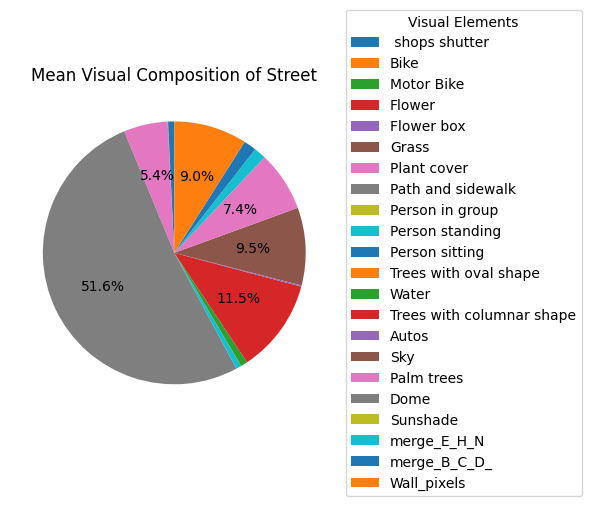

In [56]:
def ignorepct(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    street_mean_ratio_34,
    autopct=ignorepct,   # hide < 3%
    startangle=90,
    labels=None             # remove labels inside slices
)

# Add legend instead of labels on pie
ax.legend(
    wedges,
    street_mean_ratio_34.index,
    title="Visual Elements",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Mean Visual Composition of Street")
ax.set_ylabel('')  # remove y-axis label

plt.tight_layout()
plt.show()

In [120]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df
# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]
#The code df = df.iloc[:, 1:] in Pandas selects all rows and all columns except the first one from a 
#DataFrame, then reassigns the result to the df variable, effectively dropping the first column. 
#The : selects all rows, and 1: selects all columns starting from the second one (index 1), based on
#their integer position. 

# Select only rows 34 to 43 (Python index is zero-based, so rows 34 to 42)
ChbaghDarDol_df = df.iloc[34:43, :]

# Show this subset
display(ChbaghDarDol_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = ChbaghDarDol_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
34,0.0,0.0,0.0,0.0,0.0,0.0,9832.0,338590.0,0.0,32864.0,...,0.0,16240.0,0.0,195681.0,0.0,0.0,0.0,1904.0,1101.0,1093.0
35,0.0,0.0,0.0,0.0,0.0,0.0,1266.0,369706.0,147.0,25960.0,...,19.0,6748.0,0.0,176458.0,0.0,0.0,6.0,5132.0,243.0,712.0
36,0.0,0.0,0.0,0.0,0.0,4.0,32338.0,278148.0,0.0,44279.0,...,29.0,149886.0,0.0,90223.0,0.0,0.0,0.0,10972.0,38.0,40.0
37,0.0,0.0,0.0,0.0,0.0,0.0,271.0,331543.0,0.0,16016.0,...,73816.0,33440.0,0.0,224013.0,0.0,0.0,0.0,65698.0,0.0,1556.0
38,347.0,0.0,10.0,0.0,0.0,0.0,2828.0,397885.0,0.0,29207.0,...,0.0,17766.0,329.0,171551.0,0.0,0.0,0.0,8162.0,223.0,320.0
39,10097.0,0.0,0.0,0.0,0.0,253.0,47124.0,116944.0,64.0,1707.0,...,63266.0,237477.0,0.0,190126.0,0.0,0.0,17234.0,323.0,0.0,17142.0
40,0.0,0.0,0.0,0.0,0.0,79.0,68063.0,168569.0,0.0,15600.0,...,1790.0,171135.0,0.0,1872.0,0.0,0.0,5227.0,0.0,6458.0,328.0
41,97572.0,0.0,0.0,0.0,0.0,36.0,36750.0,187759.0,0.0,27506.0,...,209.0,130619.0,0.0,0.0,0.0,0.0,0.0,38.0,37.0,0.0
42,0.0,0.0,0.0,0.0,0.0,4.0,53704.0,353609.0,0.0,7786.0,...,323.0,135161.0,8.0,15261.0,0.0,0.0,0.0,741.0,0.0,0.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,108016.0,0.0,10.0,0.0,0.0,376.0,252176.0,2542753.0,211.0,200925.0,...,139452.0,898472.0,337.0,1065185.0,0.0,0.0,22467.0,92970.0,8100.0,21191.0


In [121]:
df_ratio43 = ChbaghDarDol_df.div(ChbaghDarDol_df.sum(axis=1), axis=0)

#df=This is your original DataFrame 
# axis=1: each row = one photo,axis=1 means "move horizontally across columns
# axis=0: each column = one pixel class (e.g., greenery, building, sky, etc.).
# axis=0: mean "move vertically down rows
# df_ratio: each value represents a ratio or percentage of that class (e.g., trees or buildings)
#in the total pixels of the same photo


In [122]:
df_ratio43.head()

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
34,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.016461,0.566863,0.000000,0.055020,...,0.000000,0.027189,0.000000,0.327606,0.0,0.0,0.00000,0.003188,0.001843,0.001830
35,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.002159,0.630470,0.000251,0.044270,...,0.000032,0.011508,0.000000,0.300919,0.0,0.0,0.00001,0.008752,0.000414,0.001214
36,0.000000,0.0,0.000000,0.0,0.0,0.000007,0.053367,0.459023,0.000000,0.073073,...,0.000048,0.247354,0.000000,0.148893,0.0,0.0,0.00000,0.018107,0.000063,0.000066
37,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000363,0.444217,0.000000,0.021459,...,0.098902,0.044805,0.000000,0.300143,0.0,0.0,0.00000,0.088025,0.000000,0.002085
38,0.000552,0.0,0.000016,0.0,0.0,0.000000,0.004499,0.632942,0.000000,0.046462,...,0.000000,0.028262,0.000523,0.272897,0.0,0.0,0.00000,0.012984,0.000355,0.000509


In [123]:
street_mean_ratio43 = df_ratio43.mean(axis=0)


In [124]:
display(street_mean_ratio43)


 shops shutter               0.024221
Bike                         0.000000
Motor Bike                   0.000002
Flower                       0.000000
Flower box                   0.000000
Grass                        0.000070
Plant cover                  0.052251
Path and sidewalk            0.477652
Person in group              0.000038
Person standing              0.038803
Person sitting               0.000000
Trees with oval shape        0.000000
Water                        0.021580
Trees with columnar shape    0.177513
Autos                        0.000060
Sky                          0.183621
Palm trees                   0.000000
Dome                         0.000000
Sunshade                     0.004052
merge_E_H_N                  0.014767
merge_B_C_D_                 0.001940
Wall_pixels                  0.003431
dtype: float64

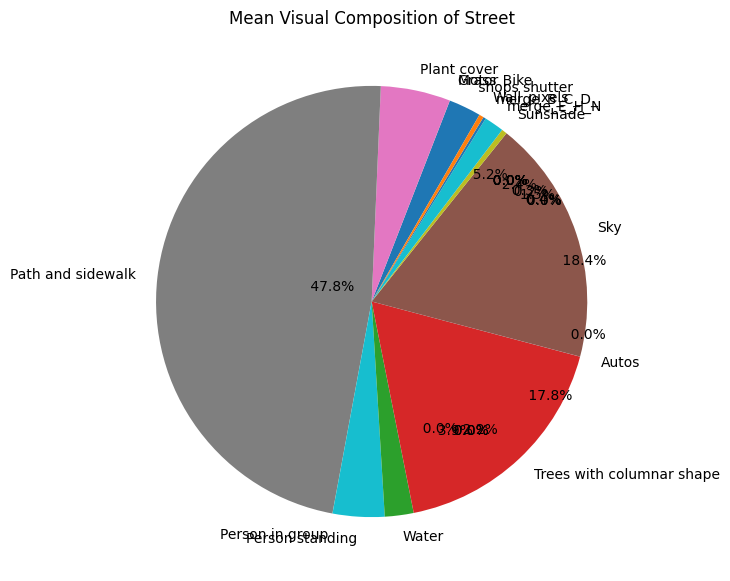

In [125]:

# Plot a pie chart
street_mean_ratio43.plot(
    kind='pie',
    autopct='% 45.1f%%',       # Show percentages
    figsize=(7, 7),
    startangle=60,           # Rotate so first slice starts at top
    ylabel=''                # Remove y-axis label
)

plt.title("Mean Visual Composition of Street")
plt.show()


In [126]:


# Suppose df_ratio_15 is one street with 15 photos (rows)
df_ratio43["group_id"] = np.arange(len(df_ratio43)) // 5  # groups of 7 rows
#This line divides your rows into groups of 5
# Compute mean ratios for each group of 5 photos
street_part_means43 = (
    df_ratio43.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means43

,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.00011,0.0,0.000003,0.0,0.0,0.000001,0.015370,0.546703,0.000050,...,0.019797,0.071823,0.000105,0.270092,0.0,0.0,0.000002,0.026211,0.000535,0.001141
1,1,0.05436,0.0,0.000000,0.0,0.0,0.000156,0.098353,0.391338,0.000023,...,0.023809,0.309625,0.000004,0.075532,0.0,0.0,0.009115,0.000462,0.003696,0.006294


In [127]:
# # Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 43 to 66 (Python index is zero-based, so rows 43 to 66)
ChbaghL_df = df.iloc[43:66, :]

# Show this subset
display(ChbaghL_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = ChbaghL_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,Person sitting,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
43,0.0,0.0,0.0,0.0,343.0,84526.0,194443.0,0.0,20359.0,0.0,...,4911.0,169908.0,0.0,413.0,0.0,0.0,130.0,4611.0,5990.0,24.0
44,1354.0,8357.0,0.0,0.0,1111.0,44248.0,290600.0,11.0,15516.0,0.0,...,163.0,121473.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,201.0,0.0,0.0,203.0,58578.0,171226.0,18.0,18630.0,0.0,...,144.0,123711.0,0.0,0.0,0.0,0.0,296.0,1387.0,11647.0,4860.0
46,0.0,0.0,0.0,0.0,196.0,42938.0,275843.0,0.0,2864.0,0.0,...,631.0,122005.0,0.0,18.0,0.0,0.0,2529.0,79.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,32796.0,341217.0,0.0,10339.0,0.0,...,0.0,129083.0,0.0,811.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0.0,0.0,0.0,0.0,323.0,43343.0,155064.0,0.0,33906.0,0.0,...,567.0,99977.0,0.0,0.0,0.0,0.0,0.0,0.0,2475.0,157.0
49,0.0,0.0,0.0,0.0,20.0,22174.0,261371.0,425.0,88316.0,0.0,...,0.0,150660.0,0.0,115.0,0.0,0.0,0.0,809.0,4.0,780.0
50,0.0,0.0,0.0,0.0,4727.0,67365.0,112186.0,2968.0,39903.0,0.0,...,802.0,87256.0,0.0,30.0,0.0,0.0,0.0,1868.0,2861.0,0.0
51,0.0,0.0,0.0,0.0,8.0,25027.0,379298.0,0.0,4017.0,0.0,...,0.0,63617.0,0.0,9.0,0.0,0.0,0.0,2309.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,38903.0,158428.0,0.0,39573.0,0.0,...,0.0,74752.0,0.0,244.0,0.0,0.0,0.0,0.0,2486.0,5781.0


,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,Person sitting,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,3290.0,10673.0,0.0,0.0,7820.0,933813.0,5385628.0,11622.0,596188.0,9448.0,...,260967.0,2786173.0,0.0,115135.0,0.0,0.0,14342.0,41086.0,49342.0,34918.0


In [128]:
df_ratio_43 = ChbaghL_df.div(ChbaghL_df.sum(axis=1), axis=0)


In [129]:
df_ratio43.head()

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels,group_id
34,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.016461,0.566863,0.000000,0.055020,...,0.027189,0.000000,0.327606,0.0,0.0,0.00000,0.003188,0.001843,0.001830,0
35,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.002159,0.630470,0.000251,0.044270,...,0.011508,0.000000,0.300919,0.0,0.0,0.00001,0.008752,0.000414,0.001214,0
36,0.000000,0.0,0.000000,0.0,0.0,0.000007,0.053367,0.459023,0.000000,0.073073,...,0.247354,0.000000,0.148893,0.0,0.0,0.00000,0.018107,0.000063,0.000066,0
37,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000363,0.444217,0.000000,0.021459,...,0.044805,0.000000,0.300143,0.0,0.0,0.00000,0.088025,0.000000,0.002085,0
38,0.000552,0.0,0.000016,0.0,0.0,0.000000,0.004499,0.632942,0.000000,0.046462,...,0.028262,0.000523,0.272897,0.0,0.0,0.00000,0.012984,0.000355,0.000509,0


In [130]:


# Suppose df_ratio_34 is one street with 15 photos (rows)
#This line divides your rows into groups of 5
# Compute mean ratios for each group of 5 photos

groups = np.arange(len(df_ratio_43)) // 5

street_part_means_43 = (
    df_ratio_43.groupby(groups)
    .mean(numeric_only=True)
    .reset_index(drop=True)
)



street_part_means_43





,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,Person sitting,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0.000561,0.003564,0.0,0.0,0.000793,0.115070,0.544147,0.000014,0.029645,0.000000,...,0.002446,0.288360,0.0,0.000498,0.0,0.0,0.001336,0.002644,0.008426,0.002496
1,0.000000,0.000000,0.0,0.0,0.003158,0.111229,0.521018,0.002017,0.105215,0.000000,...,0.000839,0.245036,0.0,0.000219,0.0,0.0,0.000000,0.002450,0.004817,0.004002
2,0.000519,0.000567,0.0,0.0,0.000115,0.050257,0.489264,0.004010,0.149909,0.000000,...,0.000132,0.249674,0.0,0.027381,0.0,0.0,0.000006,0.013041,0.013913,0.001213
3,0.000000,0.000000,0.0,0.0,0.000011,0.090480,0.467926,0.000313,0.015333,0.011384,...,0.077414,0.297678,0.0,0.013974,0.0,0.0,0.002627,0.001249,0.000323,0.021287
4,0.000000,0.000000,0.0,0.0,0.000378,0.084782,0.494069,0.000000,0.023081,0.000051,...,0.122769,0.255863,0.0,0.014864,0.0,0.0,0.004051,0.000073,0.000000,0.000017


In [131]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
ChbaghMid_df = df.iloc[66:81, :]

# Show this subset
display(ChbaghMid_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = ChbaghMid_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
66,0.0,0.0,0.0,0.0,0.0,181.0,35934.0,244878.0,0.0,11536.0,...,62516.0,89476.0,0.0,1286.0,0.0,0.0,767.0,35.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,269.0,55076.0,241038.0,0.0,13369.0,...,60541.0,103361.0,0.0,1747.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,2679.0,12362.0,170417.0,0.0,35840.0,...,91578.0,544153.0,0.0,603.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,600.0,33502.0,154128.0,0.0,57984.0,...,62389.0,151595.0,0.0,9327.0,0.0,0.0,0.0,9707.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,58277.0,281368.0,0.0,5666.0,...,76703.0,130122.0,0.0,4017.0,0.0,0.0,0.0,237.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,13203.0,51162.0,249877.0,0.0,13551.0,...,56908.0,179549.0,11.0,5725.0,0.0,0.0,366.0,1275.0,0.0,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,30821.0,249874.0,1753.0,28164.0,...,68348.0,67910.0,0.0,239.0,0.0,0.0,2478.0,0.0,0.0,160.0
73,0.0,0.0,0.0,0.0,0.0,0.0,4083.0,116.0,0.0,129.0,...,59790.0,1117.0,0.0,0.0,0.0,0.0,453.0,0.0,0.0,84031.0
74,0.0,0.0,0.0,0.0,0.0,0.0,31969.0,237570.0,0.0,14291.0,...,67011.0,111067.0,0.0,2870.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,406.0,118.0,0.0,0.0,11.0,56381.0,175919.0,0.0,11985.0,...,48612.0,232758.0,0.0,0.0,0.0,0.0,0.0,1095.0,0.0,0.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,40.0,1006.0,903.0,0.0,0.0,17442.0,475905.0,2902387.0,1807.0,343308.0,...,724211.0,2032077.0,11.0,47088.0,0.0,0.0,4171.0,446575.0,30.0,84364.0


In [132]:
df_ratio_66 = ChbaghMid_df.div(ChbaghMid_df.sum(axis=1), axis=0)


In [133]:
# Suppose df_ratio_66 is one street with  photos (rows)
df_ratio_66["group_id"] = np.arange(len(df_ratio_66)) // 5  # groups of 5 rows

#This line divides your rows into groups of 5
# Compute mean ratios for each group of 5 photos

street_part_means_66 = (
    df_ratio_66.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means_66


,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.000000,0.000000,0.000000,0.0,0.0,0.001062,0.076669,0.414381,0.000000,...,0.127662,0.318566,0.000000,0.006675,0.0,0.0,0.000343,0.004035,0.000000,0.000000
1,1,0.000000,0.000154,0.000045,0.0,0.0,0.004624,0.072203,0.367655,0.000780,...,0.177449,0.230591,0.000004,0.003344,0.0,0.0,0.001835,0.000861,0.000000,0.112323
2,2,0.000028,0.000255,0.000323,0.0,0.0,0.000171,0.044693,0.383348,0.000022,...,0.023773,0.161482,0.000000,0.008613,0.0,0.0,0.000083,0.304547,0.000019,0.000075


In [134]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 81 to 117)
ChbaghR_df = df.iloc[81:117, :]

# Show this subset
display(ChbaghR_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = ChbaghR_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
81,656.0,0.0,0.0,0.0,0.0,0.0,41365.0,260476.0,1305.0,37838.0,...,175.0,49751.0,0.0,2973.0,271.0,0.0,0.0,0.0,4771.0,1013.0
82,0.0,0.0,0.0,0.0,0.0,0.0,64743.0,340161.0,0.0,13492.0,...,0.0,233845.0,0.0,11771.0,0.0,0.0,0.0,0.0,37.0,11.0
83,0.0,0.0,0.0,0.0,0.0,1.0,54524.0,320010.0,0.0,10105.0,...,0.0,86303.0,0.0,4584.0,0.0,0.0,0.0,2745.0,0.0,0.0
84,313351.0,0.0,0.0,0.0,0.0,0.0,1254.0,6444.0,16907.0,204.0,...,0.0,10025.0,0.0,19281.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,37.0,45082.0,336549.0,0.0,0.0,...,0.0,88707.0,0.0,7439.0,0.0,0.0,0.0,3131.0,0.0,62.0
86,0.0,0.0,0.0,0.0,0.0,0.0,824.0,75742.0,0.0,0.0,...,2075.0,30026.0,0.0,0.0,0.0,0.0,0.0,2620.0,0.0,55616.0
87,0.0,0.0,0.0,0.0,0.0,66.0,49354.0,236288.0,0.0,38673.0,...,197.0,437438.0,0.0,21069.0,0.0,0.0,0.0,454.0,283.0,0.0
88,0.0,0.0,0.0,0.0,0.0,1440.0,22118.0,252092.0,0.0,5657.0,...,0.0,175767.0,0.0,0.0,0.0,0.0,0.0,164.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,68.0,58095.0,297471.0,47.0,11376.0,...,3966.0,237103.0,0.0,11698.0,0.0,0.0,308.0,0.0,32.0,0.0
90,2258.0,0.0,0.0,0.0,0.0,375.0,28419.0,159995.0,162.0,8255.0,...,3723.0,105645.0,0.0,14204.0,0.0,0.0,1146.0,762.0,592.0,116320.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,456826.0,40978.0,9229.0,0.0,0.0,40267.0,1067465.0,7456921.0,117506.0,440446.0,...,253707.0,4468969.0,0.0,192438.0,26619.0,0.0,215265.0,194765.0,144688.0,952849.0


In [135]:
df_ratio_81 = ChbaghR_df.div(ChbaghR_df.sum(axis=1), axis=0)


In [136]:
display(df_ratio_81)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
81,0.001638,0.000000,0.000000,0.0,0.0,0.000000,0.103259,0.650224,0.003258,0.094455,...,0.000437,0.124193,0.0,0.007421,0.000676,0.0,0.000000,0.000000,0.011910,0.002529
82,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.097496,0.512244,0.000000,0.020317,...,0.000000,0.352144,0.0,0.017726,0.000000,0.0,0.000000,0.000000,0.000056,0.000017
83,0.000000,0.000000,0.000000,0.0,0.0,0.000002,0.114002,0.669096,0.000000,0.021128,...,0.000000,0.180448,0.0,0.009585,0.000000,0.0,0.000000,0.005739,0.000000,0.000000
84,0.852735,0.000000,0.000000,0.0,0.0,0.000000,0.003413,0.017536,0.046010,0.000555,...,0.000000,0.027281,0.0,0.052470,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
85,0.000000,0.000000,0.000000,0.0,0.0,0.000077,0.093724,0.699676,0.000000,0.000000,...,0.000000,0.184419,0.0,0.015465,0.000000,0.0,0.000000,0.006509,0.000000,0.000129
86,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.004937,0.453808,0.000000,0.000000,...,0.012432,0.179901,0.0,0.000000,0.000000,0.0,0.000000,0.015698,0.000000,0.333223
87,0.000000,0.000000,0.000000,0.0,0.0,0.000084,0.062966,0.301456,0.000000,0.049339,...,0.000251,0.558083,0.0,0.026880,0.000000,0.0,0.000000,0.000579,0.000361,0.000000
88,0.000000,0.000000,0.000000,0.0,0.0,0.003149,0.048373,0.551337,0.000000,0.012372,...,0.000000,0.384410,0.0,0.000000,0.000000,0.0,0.000000,0.000359,0.000000,0.000000
89,0.000000,0.000000,0.000000,0.0,0.0,0.000110,0.093677,0.479665,0.000076,0.018344,...,0.006395,0.382323,0.0,0.018863,0.000000,0.0,0.000497,0.000000,0.000052,0.000000
90,0.005110,0.000000,0.000000,0.0,0.0,0.000849,0.064317,0.362098,0.000367,0.018683,...,0.008426,0.239094,0.0,0.032146,0.000000,0.0,0.002594,0.001725,0.001340,0.263253


In [137]:
street_mean_ratio_81 = df_ratio_81.mean(axis=0)
display(street_mean_ratio_81)

 shops shutter               0.035492
Bike                         0.017046
Motor Bike                   0.001404
Flower                       0.000000
Flower box                   0.000000
Grass                        0.001629
Plant cover                  0.058742
Path and sidewalk            0.435197
Person in group              0.034635
Person standing              0.028798
Person sitting               0.000000
Trees with oval shape        0.000000
Water                        0.009745
Trees with columnar shape    0.251728
Autos                        0.000000
Sky                          0.009259
Palm trees                   0.001701
Dome                         0.000000
Sunshade                     0.012155
merge_E_H_N                  0.011375
merge_B_C_D_                 0.014537
Wall_pixels                  0.076556
dtype: float64

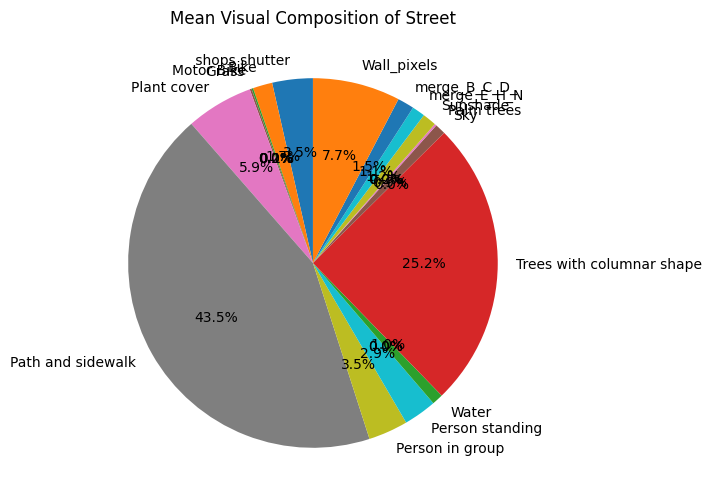

In [138]:

# Plot a pie chart
street_mean_ratio_81.plot(
    kind='pie',
    autopct='%1.1f%%',       # Show percentages
    figsize=(6, 6),
    startangle=90,           # Rotate so first slice starts at top
    ylabel=''                # Remove y-axis label
)

plt.title("Mean Visual Composition of Street")
plt.show()


In [139]:
# Suppose df_ratio_81 is one street with  photos (rows)
df_ratio_81["group_id"] = np.arange(len(df_ratio_81)) // 5  # groups of 5 rows
#This line divides your rows into groups of 5
# Compute mean ratios for each group of 5 photos
street_part_means_81 = (
    df_ratio_81.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index())

street_part_means_81


,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.170874,0.000000,0.000000,0.0,0.0,0.000016,0.082379,0.509755,0.009853,...,0.000087,0.173697,0.0,0.020533,0.000135,0.0,0.000000,0.002450,0.002393,0.000535
1,1,0.001022,0.000000,0.000000,0.0,0.0,0.000838,0.054854,0.429673,0.000088,...,0.005501,0.348762,0.0,0.015578,0.000000,0.0,0.000618,0.003672,0.000350,0.119295
2,2,0.033632,0.120173,0.007320,0.0,0.0,0.000421,0.049715,0.306178,0.015643,...,0.000294,0.343273,0.0,0.000228,0.000000,0.0,0.000771,0.001394,0.009921,0.023942
3,3,0.000099,0.000000,0.000000,0.0,0.0,0.000101,0.040862,0.364170,0.198827,...,0.000108,0.302612,0.0,0.001833,0.000000,0.0,0.000018,0.001676,0.002130,0.076534
4,4,0.041618,0.000497,0.001986,0.0,0.0,0.007290,0.046524,0.446843,0.012449,...,0.002668,0.242867,0.0,0.001740,0.000000,0.0,0.000037,0.005320,0.067087,0.100836
5,5,0.008295,0.000000,0.000000,0.0,0.0,0.000038,0.039774,0.425053,0.006208,...,0.001749,0.158342,0.0,0.004046,0.011808,0.0,0.086051,0.046441,0.004824,0.195583
6,6,0.000000,0.002059,0.000802,0.0,0.0,0.003015,0.083043,0.555599,0.006305,...,0.041134,0.198326,0.0,0.018321,0.000143,0.0,0.000000,0.018569,0.017963,0.026562
7,7,0.000000,0.000000,0.000000,0.0,0.0,0.000060,0.128977,0.480738,0.000000,...,0.093105,0.222817,0.0,0.021930,0.000797,0.0,0.000090,0.011885,0.000005,0.039596


In [140]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
NagJaAx_df = df.iloc[126:132, :]

# Show this subset
display(NagJaAx_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = NagJaAx_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
126,0.0,0.0,0.0,0.0,0.0,70.0,80828.0,246520.0,0.0,1634.0,...,0.0,0.0,0.0,136565.0,14451.0,0.0,0.0,1.0,0.0,482.0
127,0.0,0.0,84.0,0.0,0.0,0.0,185.0,201675.0,16438.0,98920.0,...,0.0,0.0,0.0,126236.0,0.0,0.0,0.0,0.0,0.0,0.0
128,0.0,76.0,4336.0,0.0,0.0,1.0,9770.0,237669.0,0.0,40543.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,4598.0,0.0,4712.0,0.0,0.0,223.0,42738.0,155904.0,1043.0,96100.0,...,0.0,0.0,0.0,130900.0,0.0,0.0,0.0,0.0,3342.0,1421.0
130,632.0,0.0,0.0,0.0,0.0,18296.0,13405.0,114433.0,0.0,61988.0,...,0.0,0.0,0.0,111399.0,0.0,0.0,1291.0,0.0,94738.0,62518.0
131,1084.0,0.0,0.0,0.0,0.0,6323.0,50779.0,209364.0,0.0,75170.0,...,0.0,0.0,0.0,87908.0,0.0,0.0,0.0,438.0,22836.0,12786.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,6314.0,76.0,9132.0,0.0,0.0,24913.0,197705.0,1165565.0,17481.0,374355.0,...,0.0,0.0,0.0,593008.0,14451.0,0.0,1291.0,439.0,120916.0,77207.0


In [141]:
df_ratio_126 = NagJaAx_df.div(NagJaAx_df.sum(axis=1), axis=0)


In [142]:
display(df_ratio_126)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
126,0.000000,0.00000,0.000000,0.0,0.0,0.000146,0.168199,0.512994,0.000000,0.003400,...,0.0,0.0,0.0,0.284184,0.030072,0.0,0.00000,0.000002,0.000000,0.001003
127,0.000000,0.00000,0.000189,0.0,0.0,0.000000,0.000417,0.454696,0.037061,0.223025,...,0.0,0.0,0.0,0.284611,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
128,0.000000,0.00026,0.014825,0.0,0.0,0.000003,0.033404,0.812599,0.000000,0.138618,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
129,0.010368,0.00000,0.010625,0.0,0.0,0.000503,0.096365,0.351532,0.002352,0.216686,...,0.0,0.0,0.0,0.295153,0.000000,0.0,0.00000,0.000000,0.007536,0.003204
130,0.001317,0.00000,0.000000,0.0,0.0,0.038123,0.027932,0.238445,0.000000,0.129165,...,0.0,0.0,0.0,0.232123,0.000000,0.0,0.00269,0.000000,0.197406,0.130269
131,0.002321,0.00000,0.000000,0.0,0.0,0.013538,0.108719,0.448253,0.000000,0.160941,...,0.0,0.0,0.0,0.188213,0.000000,0.0,0.00000,0.000938,0.048892,0.027375


In [143]:
street_mean_ratio_126 = df_ratio_126.mean(axis=0)
display(street_mean_ratio_126)

 shops shutter               0.002334
Bike                         0.000043
Motor Bike                   0.004273
Flower                       0.000000
Flower box                   0.000000
Grass                        0.008719
Plant cover                  0.072506
Path and sidewalk            0.469753
Person in group              0.006569
Person standing              0.145306
Person sitting               0.001552
Trees with oval shape        0.000000
Water                        0.000000
Trees with columnar shape    0.000000
Autos                        0.000000
Sky                          0.214047
Palm trees                   0.005012
Dome                         0.000000
Sunshade                     0.000448
merge_E_H_N                  0.000157
merge_B_C_D_                 0.042306
Wall_pixels                  0.026975
dtype: float64

In [144]:
# Suppose df_ratio_81 is one street with  photos (rows)
df_ratio_126["group_id"] = np.arange(len(df_ratio_126)) // 3  # groups of 3 rows
#This line divides your rows into groups of 2
# Compute mean ratios for each group of 5 photos
street_part_means_126 = (
    df_ratio_126.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means_126


,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.000000,0.000087,0.005005,0.0,0.0,0.000050,0.067340,0.593430,0.012354,...,0.0,0.0,0.0,0.189599,0.010024,0.0,0.000000,6.936482e-07,0.000000,0.000334
1,1,0.004668,0.000000,0.003542,0.0,0.0,0.017388,0.077672,0.346076,0.000784,...,0.0,0.0,0.0,0.238496,0.000000,0.0,0.000897,3.125890e-04,0.084611,0.053616


In [145]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
NagJaSWalk_df = df.iloc[132:146, :]

# Show this subset
display(NagJaSWalk_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = NagJaSWalk_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
132,0.0,0.0,88.0,0.0,0.0,3.0,30701.0,257952.0,1422.0,39092.0,...,0.0,69216.0,0.0,134271.0,0.0,0.0,0.0,5364.0,9308.0,17832.0
133,0.0,0.0,0.0,0.0,0.0,0.0,25299.0,212187.0,405.0,95595.0,...,0.0,112715.0,93.0,68646.0,0.0,0.0,0.0,1073.0,24762.0,13736.0
134,6.0,0.0,0.0,0.0,0.0,26313.0,24972.0,267727.0,0.0,43374.0,...,0.0,0.0,0.0,96097.0,0.0,0.0,0.0,0.0,3421.0,45224.0
135,751.0,0.0,0.0,0.0,0.0,0.0,6136.0,248927.0,100.0,131642.0,...,54.0,225315.0,0.0,60616.0,0.0,0.0,0.0,7.0,38431.0,5592.0
136,0.0,0.0,0.0,0.0,0.0,22088.0,53146.0,284109.0,0.0,37371.0,...,2.0,2333.0,0.0,147900.0,0.0,0.0,0.0,1002.0,0.0,39.0
137,0.0,0.0,0.0,0.0,0.0,0.0,156.0,19322.0,44291.0,0.0,...,0.0,0.0,0.0,8608.0,0.0,0.0,0.0,38257.0,0.0,0.0
138,139.0,0.0,0.0,0.0,0.0,0.0,18958.0,134.0,37685.0,86528.0,...,0.0,1591.0,0.0,150741.0,0.0,0.0,0.0,54.0,2.0,15175.0
139,191.0,0.0,0.0,0.0,0.0,0.0,0.0,278199.0,0.0,10067.0,...,8.0,1840.0,0.0,63564.0,0.0,0.0,0.0,182.0,12609.0,186559.0
140,2482.0,0.0,0.0,0.0,0.0,5812.0,13902.0,213404.0,0.0,36875.0,...,0.0,0.0,0.0,39935.0,0.0,0.0,0.0,912.0,281.0,106.0
141,129.0,0.0,0.0,0.0,0.0,28967.0,25793.0,9794.0,0.0,3061.0,...,0.0,0.0,0.0,5615.0,0.0,0.0,32130.0,752.0,165757.0,31633.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,4240.0,0.0,159341.0,0.0,0.0,83304.0,258574.0,2335335.0,100668.0,518048.0,...,64.0,687542.0,10378.0,1014180.0,162.0,0.0,32130.0,49740.0,263650.0,670913.0


In [146]:
df_ratio_132 = NagJaSWalk_df.div(NagJaSWalk_df.sum(axis=1), axis=0)


In [147]:
street_mean_ratio_132 = df_ratio_132.mean(axis=0)
display(street_mean_ratio_132)

 shops shutter               0.000806
Bike                         0.000000
Motor Bike                   0.023475
Flower                       0.000000
Flower box                   0.000000
Grass                        0.014728
Plant cover                  0.040147
Path and sidewalk            0.335193
Person in group              0.039714
Person standing              0.076489
Person sitting               0.009926
Trees with oval shape        0.000000
Water                        0.000007
Trees with columnar shape    0.085600
Autos                        0.001500
Sky                          0.160491
Palm trees                   0.000023
Dome                         0.000000
Sunshade                     0.007548
merge_E_H_N                  0.026374
merge_B_C_D_                 0.050644
Wall_pixels                  0.127336
dtype: float64

In [148]:
# Suppose df_ratio_81 is one street with  photos (rows)
df_ratio_132["group_id"] = np.arange(len(df_ratio_132)) // 5  # groups of 5 rows
#This line divides your rows into groups of 2
# Compute mean ratios for each group of 5 photos
street_part_means_132 = (
    df_ratio_132.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means_132


,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.000212,0.0,0.000031,0.0,0.0,0.018440,0.050912,0.446200,0.000677,...,0.000016,0.128658,0.000033,0.180956,0.000000,0.0,0.000000,0.002651,0.024255,0.030655
1,1,0.001823,0.0,0.000000,0.0,0.0,0.022754,0.038200,0.277879,0.104124,...,0.000003,0.001681,0.000000,0.163881,0.000000,0.0,0.021135,0.070335,0.113771,0.098007
2,2,0.000279,0.0,0.082122,0.0,0.0,0.000058,0.029124,0.268076,0.007999,...,0.000000,0.136674,0.005208,0.130670,0.000079,0.0,0.000000,0.001076,0.004723,0.284850


In [149]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
OstanSt_df = df.iloc[146:163, :]

# Show this subset
display(OstanSt_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = OstanSt_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
146,0.0,0.0,116342.0,0.0,0.0,0.0,0.0,155618.0,11.0,6079.0,...,0.0,89025.0,1527.0,133839.0,0.0,0.0,0.0,6528.0,885.0,51206.0
147,0.0,0.0,0.0,0.0,0.0,2.0,55239.0,212951.0,0.0,10631.0,...,54.0,163098.0,0.0,54.0,89.0,0.0,0.0,2742.0,0.0,46387.0
148,0.0,0.0,509.0,0.0,0.0,0.0,51489.0,231492.0,0.0,2538.0,...,7.0,90531.0,6228.0,97182.0,0.0,0.0,0.0,10693.0,0.0,48177.0
149,0.0,0.0,66.0,0.0,0.0,0.0,46719.0,247905.0,0.0,7943.0,...,0.0,202414.0,859.0,62943.0,0.0,0.0,0.0,0.0,1713.0,36412.0
150,0.0,0.0,3.0,0.0,0.0,0.0,68239.0,242270.0,0.0,1109.0,...,130.0,155596.0,6203.0,0.0,0.0,0.0,0.0,11475.0,535.0,48207.0
151,158.0,294.0,181910.0,0.0,0.0,0.0,0.0,49491.0,72.0,15101.0,...,0.0,22946.0,8672.0,7932.0,0.0,0.0,0.0,0.0,124.0,4816.0
152,0.0,0.0,67555.0,0.0,0.0,35.0,30136.0,207014.0,25.0,18536.0,...,76.0,140600.0,16365.0,12200.0,0.0,0.0,0.0,100.0,0.0,34483.0
153,0.0,0.0,0.0,0.0,0.0,0.0,39680.0,238263.0,0.0,2802.0,...,52.0,160290.0,0.0,27909.0,0.0,0.0,0.0,0.0,4423.0,40384.0
154,0.0,1993.0,6165.0,0.0,0.0,0.0,61910.0,213725.0,0.0,363.0,...,0.0,306255.0,3350.0,25147.0,0.0,0.0,0.0,860.0,156.0,50008.0
155,0.0,0.0,106570.0,0.0,0.0,0.0,11.0,148333.0,0.0,2921.0,...,0.0,83540.0,2886.0,116101.0,0.0,0.0,0.0,3004.0,27.0,62513.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,69568.0,3072.0,490233.0,0.0,0.0,2335.0,567676.0,3324804.0,32373.0,225797.0,...,9392.0,2157666.0,55170.0,755380.0,19275.0,0.0,0.0,85590.0,26839.0,571946.0


In [150]:
df_ratio_146 = OstanSt_df.div(OstanSt_df.sum(axis=1), axis=0)


In [151]:
display(df_ratio_146)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
146,0.000000,0.000000,0.207361,0.0,0.0,0.000000,0.000000,0.277364,0.000020,0.010835,...,0.000000,0.158673,0.002722,0.238547,0.000000,0.0,0.0,0.011635,0.001577,0.091267
147,0.000000,0.000000,0.000000,0.0,0.0,0.000004,0.112446,0.433491,0.000000,0.021641,...,0.000110,0.332008,0.000000,0.000110,0.000181,0.0,0.0,0.005582,0.000000,0.094427
148,0.000000,0.000000,0.000945,0.0,0.0,0.000000,0.095554,0.429607,0.000000,0.004710,...,0.000013,0.168009,0.011558,0.180352,0.000000,0.0,0.0,0.019844,0.000000,0.089408
149,0.000000,0.000000,0.000109,0.0,0.0,0.000000,0.076970,0.408428,0.000000,0.013086,...,0.000000,0.333481,0.001415,0.103700,0.000000,0.0,0.0,0.000000,0.002822,0.059989
150,0.000000,0.000000,0.000006,0.0,0.0,0.000000,0.127844,0.453887,0.000000,0.002078,...,0.000244,0.291505,0.011621,0.000000,0.000000,0.0,0.0,0.021498,0.001002,0.090315
151,0.000511,0.000951,0.588159,0.0,0.0,0.000000,0.000000,0.160016,0.000233,0.048825,...,0.000000,0.074190,0.028039,0.025646,0.000000,0.0,0.0,0.000000,0.000401,0.015571
152,0.000000,0.000000,0.128157,0.0,0.0,0.000066,0.057171,0.392723,0.000047,0.035164,...,0.000144,0.266730,0.031046,0.023144,0.000000,0.0,0.0,0.000190,0.000000,0.065417
153,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.077228,0.463724,0.000000,0.005453,...,0.000101,0.311968,0.000000,0.054318,0.000000,0.0,0.0,0.000000,0.008608,0.078598
154,0.000000,0.002975,0.009202,0.0,0.0,0.000000,0.092412,0.319025,0.000000,0.000542,...,0.000000,0.457143,0.005001,0.037537,0.000000,0.0,0.0,0.001284,0.000233,0.074646
155,0.000000,0.000000,0.202641,0.0,0.0,0.000000,0.000021,0.282052,0.000000,0.005554,...,0.000000,0.158850,0.005488,0.220764,0.000000,0.0,0.0,0.005712,0.000051,0.118867


In [152]:
# Suppose df_ratio_81 is one street with  photos (rows)
df_ratio_146["group_id"] = np.arange(len(df_ratio_146)) // 5  # groups of 5 rows
#This line divides your rows into groups of 2
# Compute mean ratios for each group of 5 photos
street_part_means_146 = (
    df_ratio_146.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means_146

,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.000000,0.000000,0.041684,0.0,0.0,8.142543e-07,0.082563,0.400555,0.000004,...,0.000073,0.256735,0.005463,0.104542,0.000036,0.0,0.0,0.011712,0.001080,0.085081
1,1,0.000102,0.000785,0.185632,0.0,0.0,1.327958e-05,0.045366,0.323508,0.000056,...,0.000049,0.253776,0.013915,0.072282,0.000000,0.0,0.0,0.001437,0.001859,0.070620
2,2,0.000181,0.000000,0.002645,0.0,0.0,8.924210e-04,0.078793,0.492321,0.005612,...,0.000000,0.200484,0.003607,0.105174,0.007887,0.0,0.0,0.008848,0.000838,0.056271
3,3,0.075805,0.001164,0.006312,0.0,0.0,9.755953e-04,0.040785,0.300233,0.019513,...,0.009439,0.345608,0.000000,0.012896,0.000000,0.0,0.0,0.036452,0.022416,0.011895


In [153]:
# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
SepahL_df = df.iloc[174:200, :]


# Count missing values in each column
#you can use .isnull().sum() to check how many missing values are in each column, then find which one has the most.
missing_counts = df.isnull().sum()

# Print all missing counts
print("Missing values per column:\n", missing_counts)

# Find the column with the most missing values
max_missing_col = missing_counts.idxmax()
max_missing_val = missing_counts.max()

print(f"\nColumn with the most missing values: {max_missing_col} → {max_missing_val} missing")

Missing values per column:
 Bike                         4
Motor Bike                   4
Flower                       4
Flower box                   4
Grass                        4
Plant cover                  4
Path and sidewalk            4
Person in group              4
Person standing              4
Person sitting               4
Trees with oval shape        4
Water                        4
Trees with columnar shape    4
Autos                        4
Sky                          4
Palm trees                   4
Dome                         4
Sunshade                     4
merge_E_H_N                  0
merge_B_C_D_                 0
Wall_pixels                  0
dtype: int64

Column with the most missing values: Bike → 4 missing


In [154]:
from sklearn.impute import KNNImputer
# sklearn.impute is a module (sub-library) inside scikit-learn (sklearn) that provides tools for handling missing data (imputation).

# Select numeric columns for imputation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a copy of numeric data
df_numeric = df[numeric_cols]

# Initialize KNN imputer (you can change n_neighbors=3 → 5 or 7)
imputer = KNNImputer(n_neighbors=3)

# Fit and transform
df_imputed = imputer.fit_transform(df_numeric)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=numeric_cols)

# Replace original numeric columns with imputed ones
df[numeric_cols] = df_imputed

print("Missing values imputed using KNN.")
print(df.isnull().sum())


Missing values imputed using KNN.
Bike                         0
Motor Bike                   0
Flower                       0
Flower box                   0
Grass                        0
Plant cover                  0
Path and sidewalk            0
Person in group              0
Person standing              0
Person sitting               0
Trees with oval shape        0
Water                        0
Trees with columnar shape    0
Autos                        0
Sky                          0
Palm trees                   0
Dome                         0
Sunshade                     0
merge_E_H_N                  0
merge_B_C_D_                 0
Wall_pixels                  0
dtype: int64


In [155]:
imputer = KNNImputer(n_neighbors=10)


In [156]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[:, 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
SepahL_df = df.iloc[163:174, :]

# Show this subset
display(SepahL_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = SepahL_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175.0,0.0,50091.0,...,0.0,43.0,0.0,0.0,0.0,0.0,146.0,0.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0,1123.0,10513.0,16992.0,0.0,1342.0,...,5.0,1148.0,0.0,5109.0,0.0,0.0,0.0,103210.0,0.0,0.0
165,0.0,0.0,20328.0,0.0,0.0,1142.0,29003.0,318014.0,4.0,62798.0,...,0.0,98572.0,52.0,74061.0,0.0,0.0,0.0,970.0,66.0,232.0
166,4.0,402.0,63203.0,0.0,0.0,0.0,4917.0,108409.0,395.0,105010.0,...,0.0,97499.0,0.0,4398.0,0.0,0.0,0.0,37169.0,41508.0,94.0
167,4509.0,18.0,9385.0,0.0,0.0,3927.0,29477.0,103939.0,2528.0,22126.0,...,0.0,13599.0,0.0,161.0,3.0,0.0,0.0,745.0,51372.0,10736.0
168,0.0,395.0,32792.0,0.0,0.0,0.0,28.0,166024.0,1392.0,11612.0,...,0.0,261282.0,0.0,1648.0,0.0,0.0,0.0,2519.0,6287.0,81.0
169,2426.0,0.0,0.0,0.0,0.0,19723.0,25834.0,39297.0,5236.0,12187.0,...,1439.0,16076.0,5726.0,0.0,0.0,0.0,0.0,1530.0,106.0,35894.0
170,49.0,0.0,0.0,0.0,0.0,303.0,4840.0,18366.0,1014.0,45345.0,...,0.0,58800.0,0.0,438.0,0.0,0.0,0.0,14153.0,2850.0,717.0
171,0.0,0.0,9887.0,0.0,0.0,42.0,4889.0,321029.0,0.0,19507.0,...,0.0,127283.0,0.0,1179.0,0.0,0.0,0.0,9473.0,0.0,0.0
172,0.0,0.0,8619.0,0.0,0.0,28.0,7718.0,250795.0,0.0,15438.0,...,0.0,178409.0,18.0,78.0,0.0,0.0,0.0,30.0,0.0,0.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,6988.0,815.0,144271.0,0.0,0.0,26288.0,117219.0,1353726.0,10569.0,345798.0,...,1444.0,854777.0,5796.0,87179.0,3.0,0.0,146.0,169799.0,102189.0,47755.0


In [157]:
df_ratio_162 = SepahL_df.div(SepahL_df.sum(axis=1), axis=0)


In [158]:
display(df_ratio_162)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
163,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.003468,0.000000,0.992786,...,0.000000,0.000852,0.000000,0.000000,0.000000,0.0,0.002894,0.000000,0.000000,0.000000
164,0.000000,0.000000,0.000000,0.0,0.0,0.007813,0.073137,0.118211,0.000000,0.009336,...,0.000035,0.007986,0.000000,0.035543,0.000000,0.0,0.000000,0.718018,0.000000,0.000000
165,0.000000,0.000000,0.033104,0.0,0.0,0.001860,0.047231,0.517882,0.000007,0.102266,...,0.000000,0.160523,0.000085,0.120607,0.000000,0.0,0.000000,0.001580,0.000107,0.000378
166,0.000009,0.000868,0.136505,0.0,0.0,0.000000,0.010620,0.234141,0.000853,0.226800,...,0.000000,0.210577,0.000000,0.009499,0.000000,0.0,0.000000,0.080277,0.089649,0.000203
167,0.017856,0.000071,0.037165,0.0,0.0,0.015551,0.116729,0.411599,0.010011,0.087619,...,0.000000,0.053852,0.000000,0.000638,0.000012,0.0,0.000000,0.002950,0.203433,0.042515
168,0.000000,0.000816,0.067744,0.0,0.0,0.000000,0.000058,0.342982,0.002876,0.023989,...,0.000000,0.539772,0.000000,0.003405,0.000000,0.0,0.000000,0.005204,0.012988,0.000167
169,0.014413,0.000000,0.000000,0.0,0.0,0.117174,0.153480,0.233463,0.031107,0.072403,...,0.008549,0.095507,0.034018,0.000000,0.000000,0.0,0.000000,0.009090,0.000630,0.213246
170,0.000328,0.000000,0.000000,0.0,0.0,0.002031,0.032437,0.123086,0.006796,0.303894,...,0.000000,0.394068,0.000000,0.002935,0.000000,0.0,0.000000,0.094851,0.019100,0.004805
171,0.000000,0.000000,0.019842,0.0,0.0,0.000084,0.009812,0.644279,0.000000,0.039149,...,0.000000,0.255447,0.000000,0.002366,0.000000,0.0,0.000000,0.019012,0.000000,0.000000
172,0.000000,0.000000,0.018691,0.0,0.0,0.000061,0.016737,0.543867,0.000000,0.033478,...,0.000000,0.386893,0.000039,0.000169,0.000000,0.0,0.000000,0.000065,0.000000,0.000000


In [159]:


# Suppose df_ratio_81 is one street with  photos (rows)
df_ratio_162["group_id"] = np.arange(len(df_ratio_162)) // 5  # groups of 5 rows
#This line divides your rows into groups of 2
# Compute mean ratios for each group of 5 photos
street_part_means_162 = (
    df_ratio_162.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means_162


,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.003573,0.000188,0.041355,0.0,0.0,0.005045,0.049543,0.257060,0.002174,...,0.000007,0.086758,0.000017,0.033257,0.000002,0.0,0.000579,0.160565,0.058638,0.008619
1,1,0.002948,0.000163,0.021255,0.0,0.0,0.023870,0.042505,0.377536,0.008156,...,0.001710,0.334337,0.006811,0.001775,0.000000,0.0,0.000000,0.025644,0.006544,0.043644
2,2,0.000000,0.000000,0.000734,0.0,0.0,0.000000,0.000000,0.137696,0.000000,...,0.000000,0.026622,0.000000,0.001379,0.000000,0.0,0.000000,0.000000,0.000000,0.000013


In [160]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[: , 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
SepahMid_df = df.iloc[174:187 , :]

# Show this subset
display(SepahMid_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = SepahMid_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33791.0,0.0,4647.0,...,0.0,4919.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0
175,0.0,0.0,3684.0,0.0,0.0,0.0,23834.0,258907.0,745.0,11753.0,...,0.0,134393.0,35259.0,52990.0,0.0,0.0,0.0,418.0,1068.0,3698.0
176,0.0,0.0,0.0,0.0,0.0,3872.0,14381.0,228039.0,2962.0,28355.0,...,952.0,95818.0,0.0,0.0,0.0,0.0,0.0,12978.0,147.0,2678.0
177,0.0,0.0,0.0,0.0,0.0,47.0,14402.0,145309.0,1875.0,21229.0,...,0.0,145314.0,0.0,240.0,0.0,0.0,0.0,2872.0,84.0,4.0
178,0.0,0.0,0.0,0.0,0.0,0.0,5010.0,49605.0,0.0,4241.0,...,0.0,3085.0,0.0,4555.0,0.0,0.0,0.0,70311.0,0.0,0.0
179,0.0,1204.0,4221.0,0.0,0.0,139.0,1220.0,151044.0,0.0,61796.0,...,0.0,108261.0,0.0,2947.0,0.0,0.0,0.0,0.0,0.0,5359.0
180,0.0,0.0,0.0,0.0,0.0,0.0,21070.0,258172.0,0.0,25451.0,...,11331.0,104340.0,0.0,1196.0,0.0,0.0,0.0,14750.0,0.0,582.0
181,0.0,0.0,0.0,0.0,0.0,17.0,8188.0,221554.0,0.0,13571.0,...,11191.0,336423.0,0.0,1324.0,0.0,0.0,44.0,11828.0,0.0,13533.0
182,0.0,0.0,0.0,0.0,0.0,97.0,15472.0,278753.0,0.0,15266.0,...,0.0,145313.0,0.0,160.0,0.0,0.0,0.0,2104.0,0.0,191.0
183,0.0,0.0,0.0,0.0,0.0,30.0,17923.0,165490.0,610.0,70672.0,...,113.0,129031.0,0.0,363.0,0.0,0.0,0.0,89.0,0.0,0.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0.0,1204.0,7905.0,0.0,0.0,164164.0,166209.0,1964379.0,6192.0,266621.0,...,24433.0,1336593.0,35259.0,101628.0,0.0,0.0,2070.0,128334.0,2178.0,114479.0


In [161]:
df_ratio_174 = SepahMid_df.div(SepahMid_df.sum(axis=1), axis=0)
display(df_ratio_174)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
174,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.778900,0.000000,0.107116,...,0.000000,0.113385,0.000000,0.000000,0.0,0.0,0.000000,0.000599,0.000000,0.000000
175,0.0,0.000000,0.006994,0.0,0.0,0.000000,0.045247,0.491519,0.001414,0.022312,...,0.000000,0.255137,0.066937,0.100598,0.0,0.0,0.000000,0.000794,0.002028,0.007020
176,0.0,0.000000,0.000000,0.0,0.0,0.009924,0.036857,0.584443,0.007591,0.072671,...,0.002440,0.245573,0.000000,0.000000,0.0,0.0,0.000000,0.033261,0.000377,0.006863
177,0.0,0.000000,0.000000,0.0,0.0,0.000140,0.042950,0.433339,0.005592,0.063309,...,0.000000,0.433354,0.000000,0.000716,0.0,0.0,0.000000,0.008565,0.000251,0.000012
178,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.036621,0.362591,0.000000,0.031000,...,0.000000,0.022550,0.000000,0.033295,0.0,0.0,0.000000,0.513943,0.000000,0.000000
179,0.0,0.003581,0.012555,0.0,0.0,0.000413,0.003629,0.449280,0.000000,0.183812,...,0.000000,0.322022,0.000000,0.008766,0.0,0.0,0.000000,0.000000,0.000000,0.015940
180,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.048185,0.590410,0.000000,0.058204,...,0.025913,0.238614,0.000000,0.002735,0.0,0.0,0.000000,0.033732,0.000000,0.001331
181,0.0,0.000000,0.000000,0.0,0.0,0.000027,0.013233,0.358051,0.000000,0.021932,...,0.018086,0.543689,0.000000,0.002140,0.0,0.0,0.000071,0.019115,0.000000,0.021871
182,0.0,0.000000,0.000000,0.0,0.0,0.000212,0.033793,0.608840,0.000000,0.033343,...,0.000000,0.317386,0.000000,0.000349,0.0,0.0,0.000000,0.004595,0.000000,0.000417
183,0.0,0.000000,0.000000,0.0,0.0,0.000078,0.046635,0.430604,0.001587,0.183888,...,0.000294,0.335738,0.000000,0.000945,0.0,0.0,0.000000,0.000232,0.000000,0.000000


In [162]:


# Suppose df_ratio_81 is one street with  photos (rows)
df_ratio_174["group_id"] = np.arange(len(df_ratio_174)) // 5  # groups of 5 rows
#This line divides your rows into groups of 2
# Compute mean ratios for each group of 5 photos
street_part_means_174 = (
    df_ratio_174.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means_174

,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.0,0.000000,0.001399,0.0,0.0,0.002013,0.032335,0.530158,0.002919,...,0.000488,0.21400,0.013387,0.026922,0.0,0.0,0.000000,0.111432,0.000531,0.002779
1,1,0.0,0.000716,0.002511,0.0,0.0,0.000146,0.029095,0.487437,0.000317,...,0.008858,0.35149,0.000000,0.002987,0.0,0.0,0.000014,0.011535,0.000000,0.007912
2,2,0.0,0.000000,0.000000,0.0,0.0,0.382750,0.079244,0.237681,0.000000,...,0.000712,0.14827,0.000000,0.031837,0.0,0.0,0.001704,0.030625,0.000739,0.074799


In [163]:
analyzer = DataAnalyzer("/kaggle/working/droped_output.csv")
df = analyzer.df

# Drop the first row (index 0) and reset index
df = df.drop(0).reset_index(drop=True)

# Drop the first column
df = df.iloc[: , 1:]

# Select only rows 2 to 15 (Python index is zero-based, so rows 1 to 14)
SepahR_df = df.iloc[187:194 , :]

# Show this subset
display(SepahR_df)

# Now calculate column sums for this subset (numeric columns only)
column_sums = SepahR_df.select_dtypes(include='number').sum()

# Convert to a clean DataFrame
column_sums_df = pd.DataFrame(column_sums).T
display(column_sums_df)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
187,18.0,0.0,0.0,0.0,0.0,0.0,34654.0,178557.0,0.0,1099.0,...,0.0,83909.0,0.0,34576.0,0.0,0.0,0.0,4193.0,1164.0,18695.0
188,0.0,0.0,0.0,0.0,0.0,0.0,2850.0,112355.0,0.0,15464.0,...,0.0,144567.0,0.0,24088.0,0.0,0.0,0.0,0.0,266.0,49161.0
189,568.0,0.0,0.0,0.0,0.0,2906.0,17799.0,110032.0,0.0,13509.0,...,175.0,127689.0,0.0,6552.0,0.0,0.0,0.0,102.0,2788.0,132454.0
190,0.0,0.0,0.0,0.0,0.0,9241.0,17756.0,98182.0,0.0,31040.0,...,10.0,68606.0,0.0,1978.0,0.0,0.0,0.0,34.0,83.0,28093.0
191,0.0,0.0,0.0,0.0,0.0,219.0,35564.0,125827.0,0.0,34733.0,...,0.0,225158.0,0.0,384.0,0.0,0.0,0.0,807.0,332.0,44290.0
192,0.0,0.0,0.0,0.0,0.0,6056.0,34186.0,111201.0,0.0,12196.0,...,7141.0,193310.0,0.0,0.0,0.0,0.0,3549.0,0.0,0.0,6229.0
193,0.0,0.0,0.0,0.0,0.0,359.0,7253.0,92314.0,0.0,0.0,...,2.0,143163.0,0.0,0.0,0.0,0.0,0.0,0.0,3526.0,90850.0


,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,586.0,0.0,0.0,0.0,0.0,18781.0,150062.0,828468.0,0.0,108041.0,...,7328.0,986402.0,0.0,67578.0,0.0,0.0,3549.0,5136.0,8159.0,369772.0


# Making numeric new columns for correlation matrix 

In [164]:
df_ratio_187 = SepahR_df.div(SepahR_df.sum(axis=1), axis=0)
display(df_ratio_187)

,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
187,0.00005,0.0,0.0,0.0,0.0,0.000000,0.097107,0.500349,0.0,0.003080,...,0.000000,0.235128,0.0,0.096888,0.0,0.0,0.000000,0.011750,0.003262,0.052387
188,0.00000,0.0,0.0,0.0,0.0,0.000000,0.008172,0.322164,0.0,0.044341,...,0.000000,0.414528,0.0,0.069069,0.0,0.0,0.000000,0.000000,0.000763,0.140963
189,0.00137,0.0,0.0,0.0,0.0,0.007010,0.042933,0.265410,0.0,0.032585,...,0.000422,0.308001,0.0,0.015804,0.0,0.0,0.000000,0.000246,0.006725,0.319494
190,0.00000,0.0,0.0,0.0,0.0,0.035983,0.069140,0.382309,0.0,0.120866,...,0.000039,0.267144,0.0,0.007702,0.0,0.0,0.000000,0.000132,0.000323,0.109391
191,0.00000,0.0,0.0,0.0,0.0,0.000468,0.076081,0.269176,0.0,0.074303,...,0.000000,0.481671,0.0,0.000821,0.0,0.0,0.000000,0.001726,0.000710,0.094748
192,0.00000,0.0,0.0,0.0,0.0,0.016198,0.091439,0.297434,0.0,0.032621,...,0.019100,0.517054,0.0,0.000000,0.0,0.0,0.009493,0.000000,0.000000,0.016661
193,0.00000,0.0,0.0,0.0,0.0,0.001064,0.021492,0.273550,0.0,0.000000,...,0.000006,0.424228,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.010448,0.269212


In [165]:


# Suppose df_ratio_81 is one street with  photos (rows)
df_ratio_187["group_id"] = np.arange(len(df_ratio_187)) // 5  # groups of 5 rows
#This line divides your rows into groups of 2
# Compute mean ratios for each group of 5 photos
street_part_means_187 = (
    df_ratio_187.groupby("group_id")
    .mean(numeric_only=True)
    .reset_index()
)

street_part_means_187

,group_id,shops shutter,Bike,Motor Bike,Flower,Flower box,Grass,Plant cover,Path and sidewalk,Person in group,...,Water,Trees with columnar shape,Autos,Sky,Palm trees,Dome,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
0,0,0.000284,0.0,0.0,0.0,0.0,0.008692,0.058686,0.347882,0.0,...,0.000092,0.341294,0.0,0.038057,0.0,0.0,0.000000,0.002771,0.002357,0.143397
1,1,0.000000,0.0,0.0,0.0,0.0,0.008631,0.056466,0.285492,0.0,...,0.009553,0.470641,0.0,0.000000,0.0,0.0,0.004746,0.000000,0.005224,0.142936


In [166]:
# Combine all grouped mean DataFrames
all_streets_groups = pd.concat([
    street_part_means_15,
    street_part_means_34,
    street_part_means43,
    street_part_means_43,
    street_part_means_66,
    street_part_means_81,
    street_part_means_126,
    street_part_means_132,
    street_part_means_146,
    street_part_means_162,
    street_part_means_174,
    street_part_means_187,
    
], ignore_index=True)


In [167]:
numeric_df = all_streets_groups.select_dtypes(include='number')


In [168]:
print("Numeric columns:", numeric_df.columns.tolist())
print("Shape of numeric_df:", numeric_df.shape)


Numeric columns: [' shops shutter', 'Bike', 'Motor Bike', 'Flower', 'Flower box', 'Grass', 'Plant cover', 'Path and sidewalk', 'Person in group', 'Person standing', 'Person sitting', 'Trees with oval shape', 'Water', 'Trees with columnar shape', 'Autos', 'Sky', 'Palm trees', 'Dome', 'Sunshade', 'merge_E_H_N', 'merge_B_C_D_', 'Wall_pixels', 'group_id']
Shape of numeric_df: (42, 23)


# Target class, Imageability

In [169]:
 # we make the Imageability column as formula below and with coeeficient 

numeric_df["Imageability"] = (
   numeric_df["Trees with columnar shape"] +
   numeric_df["Water"] +
   numeric_df["Wall_pixels"] +
   numeric_df["merge_E_H_N"]
)


In [170]:

# imageability for 12 streets and each street about  3 to 4 means. 
display(numeric_df["Imageability"])

0     0.134607
1     0.124870
2     0.063962
3     0.180617
4     0.205808
5     0.310563
6     0.209044
7     0.118972
8     0.340189
9     0.295946
10    0.252327
11    0.264059
12    0.397628
13    0.378722
14    0.450262
15    0.521224
16    0.489877
17    0.176769
18    0.477231
19    0.368903
20    0.380931
21    0.351691
22    0.402116
23    0.284591
24    0.367403
25    0.000335
26    0.053929
27    0.161981
28    0.170026
29    0.422600
30    0.353601
31    0.325882
32    0.265604
33    0.403394
34    0.255949
35    0.405335
36    0.026635
37    0.328699
38    0.379795
39    0.254405
40    0.487554
41    0.623131
Name: Imageability, dtype: float64

In [171]:
imageability_corr = numeric_df.corr(method='pearson')["Imageability"].sort_values(ascending=False)
display(imageability_corr)


Imageability                 1.000000
Trees with columnar shape    0.808173
Wall_pixels                  0.410152
Water                        0.368001
group_id                     0.155652
merge_E_H_N                  0.152318
Sunshade                     0.116303
Motor Bike                   0.086803
Bike                         0.082364
Plant cover                  0.042955
Person in group              0.023099
 shops shutter              -0.040742
Grass                       -0.053057
Person standing             -0.140708
Autos                       -0.227050
merge_B_C_D_                -0.254045
Palm trees                  -0.273653
Person sitting              -0.291467
Path and sidewalk           -0.323241
Sky                         -0.601112
Flower                            NaN
Flower box                        NaN
Trees with oval shape             NaN
Dome                              NaN
Name: Imageability, dtype: float64

In [172]:
numeric_df = all_streets_groups.select_dtypes(include='number')

# Drop unwanted numeric columns
numeric_df = numeric_df.drop(columns=["Flower", "Flower box","Trees with oval shape","Class_34","group_id","Dome"], errors="ignore")

correlation_matrix = numeric_df.corr(method='pearson')
display(correlation_matrix)


,shops shutter,Bike,Motor Bike,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,Person sitting,Water,Trees with columnar shape,Autos,Sky,Palm trees,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
shops shutter,1.000000,0.119179,-0.096558,-0.074419,0.158692,0.026997,-0.006852,0.011781,-0.066794,-0.107554,0.140751,-0.099792,-0.188904,-0.106780,-0.012104,-0.099220,0.044863,-0.188966
Bike,0.119179,1.000000,-0.009263,-0.033932,-0.061623,-0.170689,0.024979,0.103689,-0.028696,-0.073351,0.200861,-0.043261,-0.136869,-0.056778,-0.031168,-0.064892,-0.014516,-0.069136
Motor Bike,-0.096558,-0.009263,1.000000,-0.056831,-0.149474,-0.282570,-0.065988,0.020148,-0.019782,-0.147157,0.032659,0.092262,0.083489,-0.097284,-0.075012,-0.018726,-0.035944,0.234231
Grass,-0.074419,-0.033932,-0.056831,1.000000,0.087703,-0.292544,-0.029767,-0.065721,-0.035706,-0.085157,-0.083751,-0.042770,-0.037588,-0.071459,-0.014689,0.021494,-0.009088,0.063699
Plant cover,0.158692,-0.061623,-0.149474,0.087703,1.000000,0.342487,-0.174989,-0.109171,-0.336182,0.307321,0.188025,-0.123235,-0.146208,-0.151693,-0.103340,-0.210718,-0.085247,-0.244049
Path and sidewalk,0.026997,-0.170689,-0.282570,-0.292544,0.342487,1.000000,-0.194581,-0.208819,-0.417708,0.048631,-0.135436,0.225971,0.197226,0.310414,-0.078385,-0.156365,-0.239969,-0.361623
Person in group,-0.006852,0.024979,-0.065988,-0.029767,-0.174989,-0.194581,1.000000,-0.014963,-0.048545,-0.129439,0.014984,-0.073171,-0.026954,-0.102332,0.073315,-0.002644,0.261134,0.104540
Person standing,0.011781,0.103689,0.020148,-0.065721,-0.109171,-0.208819,-0.014963,1.000000,-0.121446,-0.179065,-0.115885,-0.182275,0.141102,-0.279751,-0.094617,0.350510,0.462007,-0.279043
Person sitting,-0.066794,-0.028696,-0.019782,-0.035706,-0.336182,-0.417708,-0.048545,-0.121446,1.000000,-0.074302,-0.243489,-0.041788,-0.125227,-0.062103,-0.040815,-0.069022,-0.078424,-0.106028
Water,-0.107554,-0.073351,-0.147157,-0.085157,0.307321,0.048631,-0.129439,-0.179065,-0.074302,1.000000,0.198970,-0.124162,-0.202355,-0.158468,-0.048013,-0.066923,-0.206878,-0.106478


In [173]:
 # create a separate dataframe for correlation to not reappear the dropped column in cooreelation df 
correlation_matrix = numeric_df.corr(method='pearson')
display(correlation_matrix)


,shops shutter,Bike,Motor Bike,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,Person sitting,Water,Trees with columnar shape,Autos,Sky,Palm trees,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels
shops shutter,1.000000,0.119179,-0.096558,-0.074419,0.158692,0.026997,-0.006852,0.011781,-0.066794,-0.107554,0.140751,-0.099792,-0.188904,-0.106780,-0.012104,-0.099220,0.044863,-0.188966
Bike,0.119179,1.000000,-0.009263,-0.033932,-0.061623,-0.170689,0.024979,0.103689,-0.028696,-0.073351,0.200861,-0.043261,-0.136869,-0.056778,-0.031168,-0.064892,-0.014516,-0.069136
Motor Bike,-0.096558,-0.009263,1.000000,-0.056831,-0.149474,-0.282570,-0.065988,0.020148,-0.019782,-0.147157,0.032659,0.092262,0.083489,-0.097284,-0.075012,-0.018726,-0.035944,0.234231
Grass,-0.074419,-0.033932,-0.056831,1.000000,0.087703,-0.292544,-0.029767,-0.065721,-0.035706,-0.085157,-0.083751,-0.042770,-0.037588,-0.071459,-0.014689,0.021494,-0.009088,0.063699
Plant cover,0.158692,-0.061623,-0.149474,0.087703,1.000000,0.342487,-0.174989,-0.109171,-0.336182,0.307321,0.188025,-0.123235,-0.146208,-0.151693,-0.103340,-0.210718,-0.085247,-0.244049
Path and sidewalk,0.026997,-0.170689,-0.282570,-0.292544,0.342487,1.000000,-0.194581,-0.208819,-0.417708,0.048631,-0.135436,0.225971,0.197226,0.310414,-0.078385,-0.156365,-0.239969,-0.361623
Person in group,-0.006852,0.024979,-0.065988,-0.029767,-0.174989,-0.194581,1.000000,-0.014963,-0.048545,-0.129439,0.014984,-0.073171,-0.026954,-0.102332,0.073315,-0.002644,0.261134,0.104540
Person standing,0.011781,0.103689,0.020148,-0.065721,-0.109171,-0.208819,-0.014963,1.000000,-0.121446,-0.179065,-0.115885,-0.182275,0.141102,-0.279751,-0.094617,0.350510,0.462007,-0.279043
Person sitting,-0.066794,-0.028696,-0.019782,-0.035706,-0.336182,-0.417708,-0.048545,-0.121446,1.000000,-0.074302,-0.243489,-0.041788,-0.125227,-0.062103,-0.040815,-0.069022,-0.078424,-0.106028
Water,-0.107554,-0.073351,-0.147157,-0.085157,0.307321,0.048631,-0.129439,-0.179065,-0.074302,1.000000,0.198970,-0.124162,-0.202355,-0.158468,-0.048013,-0.066923,-0.206878,-0.106478


In [174]:
# corr_df is new name for df after dropping the unwanted column whoch was numeric_df
# we Start with a fresh copy to drop all unwnted and again make correlation again against imageability
corr_df = all_streets_groups.select_dtypes(include='number').copy()


In [175]:
#Drop columns from corr_df only
# List of columns you want to drop
cols_to_drop = [
    "Flower",
    "Flower box",
    "Trees with oval shape",
    "Class_34",
    "group_id",
    "Dome"
]

# Make separate dataframe
corr_df = numeric_df.copy()

# Drop columns safely
corr_df.drop(columns=cols_to_drop, errors="ignore", inplace=True)


In [176]:
#Add Imageability to corr_df
corr_df["Imageability"] = (
     corr_df["Trees with columnar shape"] +
    corr_df["Water"] +
    0.25 * corr_df["Wall_pixels"] +
     corr_df["merge_E_H_N"]
)


In [177]:

#Move Imageability to last column
corr_df = corr_df[[c for c in corr_df.columns if c != "Imageability"] + ["Imageability"]]



In [178]:
corr_df.columns.tolist()


[' shops shutter',
 'Bike',
 'Motor Bike',
 'Grass',
 'Plant cover',
 'Path and sidewalk',
 'Person in group',
 'Person standing',
 'Person sitting',
 'Water',
 'Trees with columnar shape',
 'Autos',
 'Sky',
 'Palm trees',
 'Sunshade',
 'merge_E_H_N',
 'merge_B_C_D_',
 'Wall_pixels',
 'Imageability']

In [179]:
#compute Pearson correlation ONLY from corr_df
correlation_matrix = corr_df.corr(method="pearson")
display(correlation_matrix)


,shops shutter,Bike,Motor Bike,Grass,Plant cover,Path and sidewalk,Person in group,Person standing,Person sitting,Water,Trees with columnar shape,Autos,Sky,Palm trees,Sunshade,merge_E_H_N,merge_B_C_D_,Wall_pixels,Imageability
shops shutter,1.000000,0.119179,-0.096558,-0.074419,0.158692,0.026997,-0.006852,0.011781,-0.066794,-0.107554,0.140751,-0.099792,-0.188904,-0.106780,-0.012104,-0.099220,0.044863,-0.188966,0.026717
Bike,0.119179,1.000000,-0.009263,-0.033932,-0.061623,-0.170689,0.024979,0.103689,-0.028696,-0.073351,0.200861,-0.043261,-0.136869,-0.056778,-0.031168,-0.064892,-0.014516,-0.069136,0.116703
Motor Bike,-0.096558,-0.009263,1.000000,-0.056831,-0.149474,-0.282570,-0.065988,0.020148,-0.019782,-0.147157,0.032659,0.092262,0.083489,-0.097284,-0.075012,-0.018726,-0.035944,0.234231,0.004924
Grass,-0.074419,-0.033932,-0.056831,1.000000,0.087703,-0.292544,-0.029767,-0.065721,-0.035706,-0.085157,-0.083751,-0.042770,-0.037588,-0.071459,-0.014689,0.021494,-0.009088,0.063699,-0.082545
Plant cover,0.158692,-0.061623,-0.149474,0.087703,1.000000,0.342487,-0.174989,-0.109171,-0.336182,0.307321,0.188025,-0.123235,-0.146208,-0.151693,-0.103340,-0.210718,-0.085247,-0.244049,0.140832
Path and sidewalk,0.026997,-0.170689,-0.282570,-0.292544,0.342487,1.000000,-0.194581,-0.208819,-0.417708,0.048631,-0.135436,0.225971,0.197226,0.310414,-0.078385,-0.156365,-0.239969,-0.361623,-0.214656
Person in group,-0.006852,0.024979,-0.065988,-0.029767,-0.174989,-0.194581,1.000000,-0.014963,-0.048545,-0.129439,0.014984,-0.073171,-0.026954,-0.102332,0.073315,-0.002644,0.261134,0.104540,-0.014917
Person standing,0.011781,0.103689,0.020148,-0.065721,-0.109171,-0.208819,-0.014963,1.000000,-0.121446,-0.179065,-0.115885,-0.182275,0.141102,-0.279751,-0.094617,0.350510,0.462007,-0.279043,-0.046678
Person sitting,-0.066794,-0.028696,-0.019782,-0.035706,-0.336182,-0.417708,-0.048545,-0.121446,1.000000,-0.074302,-0.243489,-0.041788,-0.125227,-0.062103,-0.040815,-0.069022,-0.078424,-0.106028,-0.278158
Water,-0.107554,-0.073351,-0.147157,-0.085157,0.307321,0.048631,-0.129439,-0.179065,-0.074302,1.000000,0.198970,-0.124162,-0.202355,-0.158468,-0.048013,-0.066923,-0.206878,-0.106478,0.443605


In [180]:
from scipy.stats import pearsonr

corrs = {}
pvals = {}

for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        r, p = pearsonr(numeric_df[col1], numeric_df[col2])
        corrs[(col1, col2)] = r
        pvals[(col1, col2)] = p

corr_df = pd.DataFrame(corrs, index=["r"]).T.unstack().unstack()
pval_df = pd.DataFrame(pvals, index=["p"]).T.unstack().unstack()


In [181]:
display(corr_df)
display(pval_df)


r   shops shutter   shops shutter                    NaN
                   Autos                             NaN
                   Bike                              NaN
                   Grass                             NaN
                   Motor Bike                        NaN
                                                  ...   
   merge_E_H_N     Trees with columnar shape   -0.170893
                   Wall_pixels                 -0.155906
                   Water                       -0.066923
                   merge_B_C_D_                 0.139409
                   merge_E_H_N                  1.000000
Length: 324, dtype: float64

p   shops shutter   shops shutter                    NaN
                   Autos                             NaN
                   Bike                              NaN
                   Grass                             NaN
                   Motor Bike                        NaN
                                                  ...   
   merge_E_H_N     Trees with columnar shape    0.279218
                   Wall_pixels                  0.324161
                   Water                        0.673684
                   merge_B_C_D_                 0.378580
                   merge_E_H_N                  0.000000
Length: 324, dtype: float64

# Replace NaN values before comparison:otherwise py:73: RuntimeWarning: invalid value encountered

In [182]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [183]:
pval_df = pval_df.fillna(1.0)  # assume non-significant where p-value is NaN
significant_corrs = corr_df.where(pval_df < 0.05)


# Heatmap correlation from seaborn

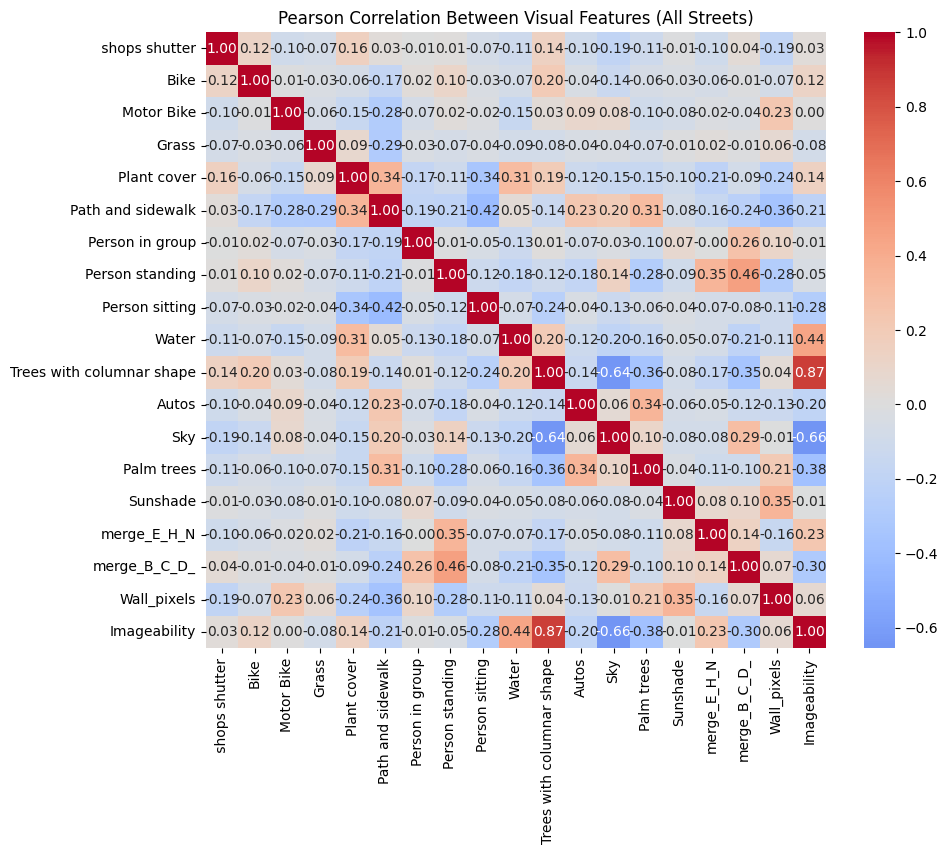

In [184]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Pearson Correlation Between Visual Features (All Streets)")
plt.show()


### This code hides the NaN cells instead of coloring them, resulting in a cleaner plot.

In [185]:
# Ensure indices and columns match
pval_df = pval_df.reindex_like(corr_df)

# Then filter correlations with significant p-values (< 0.05)
significant_corrs = corr_df.where(pval_df < 0.05)
significant_corrs = corr_df[(pval_df < 0.05)]


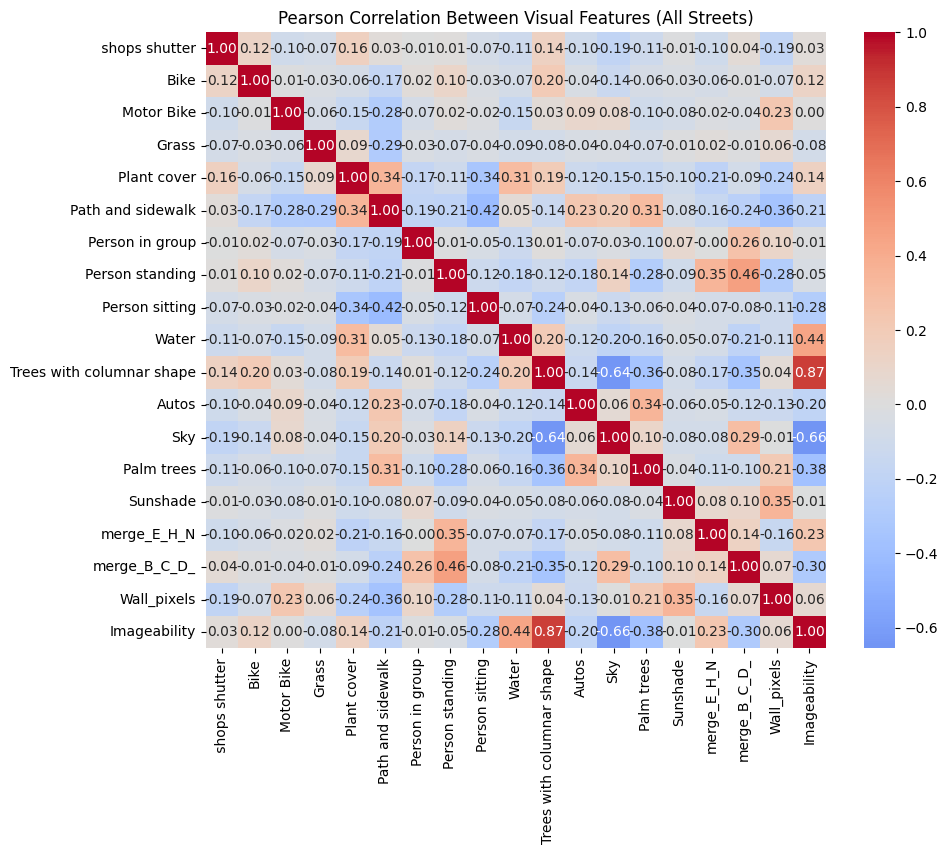

In [186]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, 
            annot=True, fmt=".2f", cmap="coolwarm", center=0, 
            mask=correlation_matrix.isnull())
plt.title("Pearson Correlation Between Visual Features (All Streets)")
plt.show()


In [187]:
# Save the correlation matrix to a CSV file
correlation_matrix.to_csv("/kaggle/working/correlation_matrix.csv", index=True)

print("Correlation matrix saved to: /kaggle/working/correlation_matrix.csv")

Correlation matrix saved to: /kaggle/working/correlation_matrix.csv
